# Data Manipulation

## Primary Dataset

### Menstrual Cycle Regularity

Menstrual cycle regularity in the past 12 months was assessed by asking participants whether they experienced regular periods. Participants were classified as having regular cycles if they reported consistent menstrual bleeding patterns. Participants who reported irregular cycles were classified as having irregular cycles, provided that no notable medical or physiological reasons were present.

**Participants were excluded from the irregularity classification if they had conditions or circumstances that naturally prevent menstruation, including: pregnancy, postpartum or breastfeeding-related amenorrhea, hysterectomy, or menopause.** This approach ensures that the measure of cycle irregularity reflects only those individuals for whom menstrual cycles would be expected under normal conditions.

In [1361]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

#### Reproductive Health

In [1362]:
# Load reproductive health dataset XPT file
cycle_17_to_pre20 = pd.read_sas('data/P_RHQ.XPT')
cycle_21_to_23 = pd.read_sas('data/RHQ_L.XPT')

# See what’s inside
print(cycle_17_to_pre20.shape)
print(cycle_21_to_23.shape)

(5314, 32)
(3917, 13)


In [1363]:
# Find overlapping columns
cycle_common_cols = cycle_17_to_pre20.columns.intersection(cycle_21_to_23.columns)

# Keep only overlapping columns
cycle_df = pd.concat([cycle_17_to_pre20[cycle_common_cols], cycle_21_to_23[cycle_common_cols]], axis=0, ignore_index=True)

In [1364]:
# Rename variables of interest
cycle_df.rename(columns={
    'RHQ031': 'Regular_Periods',
    'RHD043': 'Irregular_Period_Reason'
}, inplace=True)

In [1365]:
# Map categorical values (others become NaN automatically)
cycle_df['Regular_Periods'] = cycle_df['Regular_Periods'].map({
    1: 'Yes', 
    2: 'No'
})

In [1366]:
#Drop rows where Regular_Periods = NaN
cycle_df.dropna(subset=['Regular_Periods'],inplace=True)

# Drop rows where Irregular_Period_Reason = pregnancy (1), breast feeding (2), hysterectomy (3), or menopause (7)
cycle_df = cycle_df[~cycle_df['Irregular_Period_Reason'].isin([1, 2, 3, 7])]

In [1367]:
#Retain variables of interest only
cycle_df = cycle_df[['SEQN', 'Regular_Periods']]

In [1368]:
cycle_df

SEQN Regular_Periods
0     109264.0             Yes
1     109266.0             Yes
2     109277.0             Yes
3     109279.0             Yes
4     109284.0             Yes
...        ...             ...
9214  142263.0             Yes
9217  142269.0              No
9220  142280.0             Yes
9221  142283.0             Yes
9225  142300.0             Yes

[4459 rows x 2 columns]

In [1369]:
#Confirm only specified values remain in fields
print(cycle_df['Regular_Periods'].value_counts())

#Check value & N/A counts
print('Values: ',cycle_df['Regular_Periods'].value_counts().sum())
print('N/A: ',cycle_df['Regular_Periods'].isna().sum())
print('Total: ',cycle_df['Regular_Periods'].isna().value_counts().sum())

Regular_Periods
Yes    4063
No      396
Name: count, dtype: int64
Values:  4459
N/A:  0
Total:  4459


#### Demographics

In [1370]:
# Load demographic dataset XPT file
demo_17_to_pre20 = pd.read_sas('data/P_DEMO.XPT')
demo_21_to_23 = pd.read_sas('data/DEMO_L.XPT')

# See what’s inside
print(demo_17_to_pre20.shape)
print(demo_21_to_23.shape)

(15560, 29)
(11933, 27)


In [1371]:
# Find overlapping columns
demo_common_cols = demo_17_to_pre20.columns.intersection(demo_21_to_23.columns)

# Keep only overlapping columns
demo_df = pd.concat([demo_17_to_pre20[demo_common_cols], demo_21_to_23[demo_common_cols]], axis=0, ignore_index=True)

In [1372]:
# Merge cycle_df and demo_df on SEQN (common ID)
demo_df = pd.merge(cycle_df, demo_df, on='SEQN', how='left')

In [1373]:
# Rename variables of interest
#Already filtering by sex based on cycle data only coming from females
demo_df.rename(columns={
    'RIDRETH3': 'Race',
    'RIDAGEYR': 'Age',
    'DMDEDUC2': 'Education',
    'INDFMPIR': 'Family_Income_to_Poverty_Ratio'
}, inplace=True)

In [1374]:
# Map categorical values
demo_df['Race'] = demo_df['Race'].map({
    1: 'Mexican American', 
    2: 'Other Hispanic',
    3: 'Non-Hispanic White', 
    4: 'Non-Hispanic Black',
    6: 'Non-Hispanic Asian',
    7: 'Other Race - Including Multi-Racial'
})
demo_df['Education'] = demo_df['Education'].map({
    1: 'Less than 9th grade',
    2: '9-11th grade',
    3: 'High school/GED',
    4: 'Some college/AA',
    5: 'College graduate or above'
})

In [1375]:
#Drop rows where Age <18 & >50
#18 lower limit based on some datasets only containing data from adults (18+)
#50 upper limit based on medical research: https://www.mayoclinic.org/diseases-conditions/menopause/symptoms-causes/syc-20353397
demo_df = demo_df[(demo_df['Age'] >= 18) & (demo_df['Age'] <= 50)]

In [1376]:
#Retain variables of interest only
demo_df = demo_df[['SEQN', 'Regular_Periods', 'Race', 'Age', 'Education', 'Family_Income_to_Poverty_Ratio']]

In [1377]:
demo_df

SEQN Regular_Periods                                 Race   Age  \
1     109266.0             Yes                   Non-Hispanic Asian  29.0   
4     109284.0             Yes                     Mexican American  44.0   
5     109291.0             Yes                   Non-Hispanic Asian  42.0   
7     109297.0             Yes                   Non-Hispanic Asian  30.0   
8     109312.0             Yes                   Non-Hispanic White  48.0   
...        ...             ...                                  ...   ...   
4454  142263.0             Yes                   Non-Hispanic White  44.0   
4455  142269.0              No                   Non-Hispanic Black  32.0   
4456  142280.0             Yes  Other Race - Including Multi-Racial  23.0   
4457  142283.0             Yes  Other Race - Including Multi-Racial  29.0   
4458  142300.0             Yes                     Mexican American  46.0   

                      Education  Family_Income_to_Poverty_Ratio  
1     College graduate or above                            5.00  
4                  9-11th grade                             NaN  
5     College graduate or above                             NaN  
7               Some college/AA                             NaN  
8     College graduate or above                            5.00  
...                         ...                             ...  
4454  College graduate or above                             NaN  
4455            Some college/AA                            0.74  
4456            Some college/AA                            1.40  
4457            High school/GED                            1.04  
4458            High school/GED                            0.68  

[3143 rows x 6 columns]

In [1378]:
#Confirm only specified values remain in fields
print(demo_df['Age'].value_counts())

#Check value & N/A counts
print('Values: ',demo_df['Age'].value_counts().sum())
print('N/A: ',demo_df['Age'].isna().sum())
print('Total: ',demo_df['Age'].isna().value_counts().sum())

Age
19.0    163
18.0    141
39.0    124
34.0    114
29.0    110
31.0    107
33.0    104
37.0    104
32.0    101
41.0    100
23.0    100
28.0     97
44.0     96
43.0     96
35.0     96
25.0     96
30.0     95
42.0     94
27.0     94
38.0     92
40.0     92
36.0     91
21.0     89
24.0     87
22.0     85
45.0     83
20.0     81
47.0     81
26.0     78
48.0     74
46.0     72
50.0     56
49.0     50
Name: count, dtype: int64
Values:  3143
N/A:  0
Total:  3143


In [1379]:
#Filter cycle_df by age 18-50 now that we have age range from demo_df
cycle_df = demo_df[['SEQN', 'Regular_Periods']]

In [1380]:
cycle_df

SEQN Regular_Periods
1     109266.0             Yes
4     109284.0             Yes
5     109291.0             Yes
7     109297.0             Yes
8     109312.0             Yes
...        ...             ...
4454  142263.0             Yes
4455  142269.0              No
4456  142280.0             Yes
4457  142283.0             Yes
4458  142300.0             Yes

[3143 rows x 2 columns]

In [1381]:
# Merge cycle_df and demo_df on their common column(s)
# If both have 'SEQN', pandas will use that as the default key
primary_dataset = pd.merge(cycle_df, demo_df, on=["SEQN","Regular_Periods"], how="left")


In [1382]:
primary_dataset

SEQN Regular_Periods                                 Race   Age  \
0     109266.0             Yes                   Non-Hispanic Asian  29.0   
1     109284.0             Yes                     Mexican American  44.0   
2     109291.0             Yes                   Non-Hispanic Asian  42.0   
3     109297.0             Yes                   Non-Hispanic Asian  30.0   
4     109312.0             Yes                   Non-Hispanic White  48.0   
...        ...             ...                                  ...   ...   
3138  142263.0             Yes                   Non-Hispanic White  44.0   
3139  142269.0              No                   Non-Hispanic Black  32.0   
3140  142280.0             Yes  Other Race - Including Multi-Racial  23.0   
3141  142283.0             Yes  Other Race - Including Multi-Racial  29.0   
3142  142300.0             Yes                     Mexican American  46.0   

                      Education  Family_Income_to_Poverty_Ratio  
0     College graduate or above                            5.00  
1                  9-11th grade                             NaN  
2     College graduate or above                             NaN  
3               Some college/AA                             NaN  
4     College graduate or above                            5.00  
...                         ...                             ...  
3138  College graduate or above                             NaN  
3139            Some college/AA                            0.74  
3140            Some college/AA                            1.40  
3141            High school/GED                            1.04  
3142            High school/GED                            0.68  

[3143 rows x 6 columns]

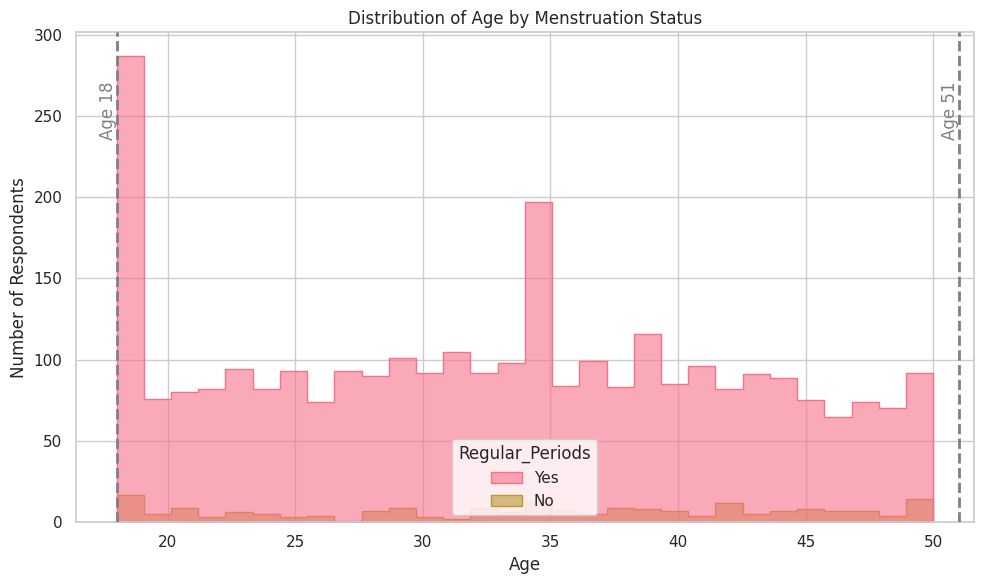

In [1383]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(
    data=primary_dataset,
    x="Age",
    hue="Regular_Periods",   # split by menstruation status
    bins=30,
    kde=False,
    element="step",         # outlines for easier comparison
    stat="count",           # you could also use "percent"
    alpha=0.6
)

# Add vertical lines at age 18 and 60
plt.axvline(x=18, color='gray', linestyle='--', linewidth=2, zorder=5)
plt.axvline(x=51, color='gray', linestyle='--', linewidth=2, zorder=5)

# Labels for the lines
plt.text(18, plt.ylim()[1]*0.9, 'Age 18', rotation=90, color='gray', ha='right', va='top')
plt.text(51, plt.ylim()[1]*0.9, 'Age 51', rotation=90, color='gray', ha='right', va='top')

plt.title("Distribution of Age by Menstruation Status")
plt.xlabel("Age")
plt.ylabel("Number of Respondents")

plt.tight_layout()
plt.show()

## Secondary Dataset
- Body Measures (height, weight, BMI)
- Smoking (smoking status, frequency, history)
- Alcohol Consumption
- Physical Activity (activity type, frequency, duration, intensity)
- Demographics (age, race/ethnicity, education, income)
- Dietary Data (diet quality, caloric and nutrient intake)
- Sleep Disorders (sleep quality, trouble sleeping, sleep duration)

#### Body Measures (height, weight, BMI)

In [1384]:
# Load body measures dataset XPT file
bmi_17_to_pre20 = pd.read_sas('data/P_BMX.XPT')
bmi_21_to_23 = pd.read_sas('data/BMX_L.XPT')

weight_17_to_pre20 = pd.read_sas('data/P_WHQ.XPT')
weight_21_to_23 = pd.read_sas('data/WHQ_L.XPT')

# See what’s inside
print(bmi_17_to_pre20.shape)
print(bmi_21_to_23.shape)

print(weight_17_to_pre20.shape)
print(weight_21_to_23.shape)

(14300, 22)
(8860, 22)
(10195, 35)
(8501, 5)


In [1385]:
# Find overlapping columns
bmi_common_cols = bmi_17_to_pre20.columns.intersection(bmi_21_to_23.columns)
weight_common_cols = weight_17_to_pre20.columns.intersection(weight_21_to_23.columns)

# Keep only overlapping columns
bmi_df = pd.concat([bmi_17_to_pre20[bmi_common_cols], bmi_21_to_23[bmi_common_cols]], axis=0, ignore_index=True)
weight_df = pd.concat([weight_17_to_pre20[weight_common_cols], weight_21_to_23[weight_common_cols]], axis=0, ignore_index=True)

In [1386]:
# Merge cycle_df and bmi_df on SEQN (common ID)
bmi_df = pd.merge(cycle_df, bmi_df, on='SEQN', how='left')
bmi_df = pd.merge(bmi_df, weight_df, on='SEQN', how='left')

In [1387]:
# Rename variables of interest
bmi_df.rename(columns={
    'BMXBMI': 'BMI',
    'BMXWAIST': 'Waist_circum_cm',
    'BMXHIP': 'Hip_Circum_cm',
    'WHQ070': 'Attempted_Weight_Loss',
    'WHD010': 'Height_in',
    'WHD020': 'Weight_lbs',
    'WHD050': 'Prev_Weight_lbs'
}, inplace=True)

In [1388]:
# Map categorical values
bmi_df['Attempted_Weight_Loss'] = bmi_df['Attempted_Weight_Loss'].map({
    1: 'Yes',
    2: 'No'
})
#Using replace over map since range values need to be retained
bmi_df['Height_in'] = bmi_df['Height_in'].replace(7777, np.nan).replace(9999, np.nan)
bmi_df['Weight_lbs'] = bmi_df['Weight_lbs'].replace(7777, np.nan).replace(9999, np.nan)
bmi_df['Prev_Weight_lbs'] = bmi_df['Prev_Weight_lbs'].replace(7777, np.nan).replace(9999, np.nan)

In [1389]:
# No additional rows need to be dropped

In [1390]:
# Add calculation column for weight loss
bmi_df['Weight_Change_lbs'] = bmi_df['Prev_Weight_lbs'] - bmi_df['Weight_lbs']

In [1391]:
#Retain variables of interest only
bmi_df = bmi_df[['SEQN','BMI', 'Waist_circum_cm', 'Hip_Circum_cm', 'Attempted_Weight_Loss', 'Height_in', 'Weight_lbs', 'Weight_Change_lbs']]

In [1392]:
bmi_df

SEQN   BMI  Waist_circum_cm  Hip_Circum_cm Attempted_Weight_Loss  \
0     109266.0  37.8            117.9          126.1                   Yes   
1     109284.0  39.1            103.1          125.5                   Yes   
2     109291.0  31.3              NaN            NaN                    No   
3     109297.0  23.2             73.2           92.5                   Yes   
4     109312.0  23.9             95.7           96.3                    No   
...        ...   ...              ...            ...                   ...   
3138  142263.0  22.6             80.4           95.0                    No   
3139  142269.0   NaN            149.3          147.2                    No   
3140  142280.0  38.4            124.1          130.0                   Yes   
3141  142283.0  45.8            137.2          145.7                   Yes   
3142  142300.0  32.6             97.6          115.4                   Yes   

      Height_in  Weight_lbs  Weight_Change_lbs  
0          64.0       210.0              -10.0  
1          60.0       178.0               -8.0  
2          64.0       148.0               -8.0  
3          60.0       120.0               -5.0  
4          66.0       139.0                0.0  
...         ...         ...                ...  
3138       65.0       135.0                0.0  
3139       64.0       350.0                0.0  
3140       69.0       250.0               20.0  
3141       67.0       275.0                5.0  
3142       62.0       169.0                3.0  

[3143 rows x 8 columns]

In [1393]:
#Confirm only specified values remain in fields
print(bmi_df['BMI'].value_counts())

#Check value & N/A counts
print('Values: ',bmi_df['BMI'].value_counts().sum())
print('N/A: ',bmi_df['BMI'].isna().sum())
print('Total: ',bmi_df['BMI'].isna().value_counts().sum())

BMI
25.2    24
23.5    24
26.1    24
21.6    23
22.7    22
        ..
49.0     1
54.7     1
64.2     1
14.8     1
45.1     1
Name: count, Length: 407, dtype: int64
Values:  3112
N/A:  31
Total:  3143


#### Smoking (smoking status, frequency, history)

In [1394]:
# Load smoking dataset XPT files
smoking_cig_17_to_pre20 = pd.read_sas('data/P_SMQ.XPT')
smoking_cig_21_to_23 = pd.read_sas('data/SMQ_L.XPT')

smoking_house_17_to_pre20 = pd.read_sas('data/P_SMQFAM.XPT')
smoking_house_21_to_23 = pd.read_sas('data/SMQFAM_L.XPT')

smoking_tobacco_17_to_pre20 = pd.read_sas('data/P_SMQRTU.XPT')
smoking_tobacco_21_to_23 = pd.read_sas('data/SMQRTU_L.XPT')

# See what’s inside
print(smoking_cig_17_to_pre20.shape)
print(smoking_cig_21_to_23.shape)

print(smoking_house_17_to_pre20.shape)
print(smoking_house_21_to_23.shape)

print(smoking_tobacco_17_to_pre20.shape)
print(smoking_tobacco_21_to_23.shape)

(11137, 16)
(9015, 9)
(15560, 3)
(11933, 3)
(10409, 25)
(7199, 21)


In [1395]:
# Find overlapping columns
smoking_cig_common_cols = smoking_cig_17_to_pre20.columns.intersection(smoking_cig_21_to_23.columns)
smoking_house_common_cols = smoking_house_17_to_pre20.columns.intersection(smoking_house_21_to_23.columns)
smoking_tobacco_common_cols = smoking_tobacco_17_to_pre20.columns.intersection(smoking_tobacco_21_to_23.columns)

# Keep only overlapping columns
smoking_cig = pd.concat([smoking_cig_17_to_pre20[smoking_cig_common_cols], smoking_cig_21_to_23[smoking_cig_common_cols]], axis=0, ignore_index=True)
smoking_house = pd.concat([smoking_house_17_to_pre20[smoking_house_common_cols], smoking_house_21_to_23[smoking_house_common_cols]], axis=0, ignore_index=True)
smoking_tobacco = pd.concat([smoking_tobacco_17_to_pre20[smoking_tobacco_common_cols], smoking_tobacco_21_to_23[smoking_tobacco_common_cols]], axis=0, ignore_index=True)

In [1396]:
# Merge cycle_df and smoking dfs on SEQN (common ID)
smoking_df = pd.merge(cycle_df, smoking_cig, on='SEQN', how='left')
smoking_df = pd.merge(smoking_df, smoking_house, on='SEQN', how='left')
smoking_df = pd.merge(smoking_df, smoking_tobacco, on='SEQN', how='left')

In [1397]:
# Rename variables of interest
smoking_df.rename(columns={
    'SMQ020': 'Smoked_100', 
    'SMQ040': 'Active_Smoker', 
    'SMQ621': 'Lifetime_Cig_Count',
    'SMD460': 'Household_Smoker_Count',
    'SMQ725': 'Last_Cig',
}, inplace=True)

In [1398]:
# Map categorical values
smoking_df['Smoked_100'] = smoking_df['Smoked_100'].map({
    1: 'Yes', 
    2: 'No'})
smoking_df['Active_Smoker'] = smoking_df['Active_Smoker'].map({
    1: 'Every day', 
    2: 'Some days',
    3: 'Not at all'})
smoking_df['Lifetime_Cig_Count'] = smoking_df['Lifetime_Cig_Count'].map({
    1: 0, 
    2: '<1',
    3: 1,
    4: '2 to 5',
    5: '6 to 15',
    6: '16 to 25',
    7: '26 to 99',
    8: '100+'})
smoking_df['Household_Smoker_Count'] = smoking_df['Household_Smoker_Count'].map({
    5.397605346934028e-79: 0, #0 is being interpreted as 5.397605346934028e-79, the lowest IBM float value
    1: 1,
    2: '2+'})
smoking_df['Last_Cig'] = smoking_df['Last_Cig'].map({
    1: 'Today', 
    2: 'Yesterday',
    3: '3 to 5 days ago'})

In [1399]:
# No additional rows need to be dropped

In [1400]:
#Retain variables of interest only
smoking_df = smoking_df[['SEQN', 'Regular_Periods', 'Smoked_100', 'Active_Smoker', 'Lifetime_Cig_Count', 'Household_Smoker_Count', 'Last_Cig']]

In [1401]:
smoking_df

SEQN Regular_Periods Smoked_100 Active_Smoker Lifetime_Cig_Count  \
0     109266.0             Yes         No           NaN                NaN   
1     109284.0             Yes         No           NaN                NaN   
2     109291.0             Yes         No           NaN                NaN   
3     109297.0             Yes         No           NaN                NaN   
4     109312.0             Yes         No           NaN                NaN   
...        ...             ...        ...           ...                ...   
3138  142263.0             Yes         No           NaN                NaN   
3139  142269.0              No         No           NaN                NaN   
3140  142280.0             Yes         No           NaN                NaN   
3141  142283.0             Yes         No           NaN                NaN   
3142  142300.0             Yes        Yes    Not at all                NaN   

     Household_Smoker_Count   Last_Cig  
0                         0        NaN  
1                         0        NaN  
2                         0        NaN  
3                         0  Yesterday  
4                         0        NaN  
...                     ...        ...  
3138                      0        NaN  
3139                      0        NaN  
3140                      0        NaN  
3141                      0        NaN  
3142                      0        NaN  

[3143 rows x 7 columns]

In [1402]:
#Confirm only specified values remain in fields
print(smoking_df['Smoked_100'].value_counts())

#Check value & N/A counts
print('Values: ',smoking_df['Smoked_100'].value_counts().sum())
print('N/A: ',smoking_df['Smoked_100'].isna().sum())
print('Total: ',smoking_df['Smoked_100'].isna().value_counts().sum())

Smoked_100
No     2315
Yes     825
Name: count, dtype: int64
Values:  3140
N/A:  3
Total:  3143


#### Alcohol

In [1403]:
# Load alcohol dataset XPT files
alcohol_17_to_pre20 = pd.read_sas('data/P_ALQ.XPT')
alcohol_21_to_23 = pd.read_sas('data/ALQ_L.XPT')

# See what’s inside
print(alcohol_17_to_pre20.shape)
print(alcohol_21_to_23.shape)

(8965, 10)
(6337, 9)


In [1404]:
# Find overlapping columns
alcohol_common_cols = alcohol_17_to_pre20.columns.intersection(alcohol_21_to_23.columns)

# Keep only overlapping columns
alcohol_df = pd.concat([alcohol_17_to_pre20[alcohol_common_cols], alcohol_21_to_23[alcohol_common_cols]], axis=0, ignore_index=True)

In [1405]:
# Merge cycle_df and alcohol_df on SEQN (common ID)
alcohol_df = pd.merge(cycle_df, alcohol_df, on='SEQN', how='left')

In [1406]:
# Rename variables of interest
alcohol_df.rename(columns={
    'ALQ121': 'Alc_Freq', 
    'ALQ130': 'Daily_Drinks',
}, inplace=True)

In [1407]:
# Map categorical values
alcohol_df['Alc_Freq'] = alcohol_df['Alc_Freq'].map({
    5.397605346934028e-79: 'Never', #0 is being interpreted as 5.397605346934028e-79, the lowest IBM float value
    1: 'Every Day',
    2: 'Nearly Every Day',
    3: '3-4x/wk',
    4: '2x/wk',
    5: '1x/wk',
    6: '2-3x/mo',
    7: '1x/mo',
    8: '7-11x/yr',
    9: '3-6x/yr',
    10: '1-2x/yr'
})
#Using replace over map since range values need to be retained
alcohol_df['Daily_Drinks'] = alcohol_df['Daily_Drinks'].replace(15, '15+' ).replace(777, np.nan).replace(999, np.nan)

In [1408]:
# No additional rows need to be dropped

In [1409]:
#Retain variables of interest only
alcohol_df = alcohol_df[['SEQN', 'Alc_Freq', 'Daily_Drinks']]

In [1410]:
alcohol_df

SEQN Alc_Freq Daily_Drinks
0     109266.0  1-2x/yr          1.0
1     109284.0      NaN          NaN
2     109291.0      NaN          NaN
3     109297.0  2-3x/mo          2.0
4     109312.0  3-6x/yr          1.0
...        ...      ...          ...
3138  142263.0    Never          NaN
3139  142269.0  3-6x/yr          2.0
3140  142280.0  1-2x/yr          3.0
3141  142283.0  2-3x/mo          2.0
3142  142300.0  2-3x/mo          6.0

[3143 rows x 3 columns]

In [1411]:
#Confirm only specified values remain in fields
print(alcohol_df['Alc_Freq'].value_counts())

#Check value & N/A counts
print('Values: ',alcohol_df['Alc_Freq'].value_counts().sum())
print('N/A: ',alcohol_df['Alc_Freq'].isna().sum())
print('Total: ',alcohol_df['Alc_Freq'].isna().value_counts().sum())

Alc_Freq
2-3x/mo             510
3-6x/yr             401
1-2x/yr             391
Never               289
1x/mo               250
2x/wk               239
1x/wk               231
7-11x/yr            194
3-4x/wk             171
Nearly Every Day     64
Every Day            30
Name: count, dtype: int64
Values:  2770
N/A:  373
Total:  3143


#### Physical Activity

In [1412]:
# Load physical activity dataset XPT files
exercise_17_to_pre20 = pd.read_sas('data/P_PAQ.XPT')
exercise_21_to_23 = pd.read_sas('data/PAQ_L.XPT')

# See what’s inside
print(exercise_17_to_pre20.shape)
print(exercise_21_to_23.shape)

(9693, 17)
(8153, 8)


In [1413]:
# Keep all columns
exercise_df = pd.concat([exercise_17_to_pre20, exercise_21_to_23], axis=0, ignore_index=True)

In [1414]:
# Merge cycle_df and exercise_df on SEQN (common ID)
exercise_df = pd.merge(cycle_df, exercise_df, on='SEQN', how='left')

In [1415]:
# Rename variables of interest
exercise_df.rename(columns={
    'PAD680': 'Sedentary_Mins',
    'PAD790Q': 'Moderate_LTPA_Freq_1',
    'PAD790U': 'Moderate_LTPA_Units',
    'PAD800': 'Moderate_LTPA_Mins_1',
    'PAD810Q': 'Vigorous_LTPA_Freq_1',
    'PAD810U': 'Vigorous_LTPA_Units',
    'PAD820': 'Vigorous_LTPA_Mins_1',
    'PAQ610': 'Vigorous_LTPA_Freq_Work',
    'PAD615': 'Vigorous_LTPA_Mins_Work',
    'PAQ625': 'Moderate_LTPA_Freq_Work',
    'PAD630': 'Moderate_LTPA_Mins_Work',
    'PAQ655': 'Vigorous_LTPA_Freq_Rec',
    'PAD660': 'Vigorous_LTPA_Mins_Rec',
    'PAQ670': 'Moderate_LTPA_Freq_Rec',
    'PAD675': 'Moderate_LTPA_Mins_Rec'
}, inplace=True)

In [1416]:
# Map categorical values
exercise_df['Moderate_LTPA_Units_Math'] = exercise_df['Moderate_LTPA_Units'].map({
    b'D': 365,
    b'M': 12,
    b'W': 52,
    b'Y': 1
})
exercise_df['Moderate_LTPA_Units_Text'] = exercise_df['Moderate_LTPA_Units'].map({
    b'D': 'day(s)',
    b'M': 'month(s)',
    b'W': 'week(s)',
    b'Y': 'year(s)'
})
exercise_df['Vigorous_LTPA_Units_Math'] = exercise_df['Vigorous_LTPA_Units'].map({
    b'D': 365,
    b'M': 12,
    b'W': 52,
    b'Y': 1
})
exercise_df['Vigorous_LTPA_Units_Text'] = exercise_df['Vigorous_LTPA_Units'].map({
    b'D': 'day(s)',
    b'M': 'month(s)',
    b'W': 'week(s)',
    b'Y': 'year(s)'
})

# Using replace over map since range values need to be retained
exercise_df['Sedentary_Mins'] = exercise_df['Sedentary_Mins'].replace(7777, np.nan).replace(9999, np.nan)

exercise_df['Moderate_LTPA_Freq_1'] = exercise_df['Moderate_LTPA_Freq_1'].replace(5.397605346934028e-79, 0).replace(7777, np.nan).replace(9999, np.nan)
exercise_df['Moderate_LTPA_Mins_1'] = exercise_df['Moderate_LTPA_Mins_1'].replace(7777, np.nan).replace(9999, np.nan)

exercise_df['Vigorous_LTPA_Freq_1'] = exercise_df['Vigorous_LTPA_Freq_1'].replace(5.397605346934028e-79, 0).replace(7777, np.nan).replace(9999, np.nan)
exercise_df['Vigorous_LTPA_Mins_1'] = exercise_df['Vigorous_LTPA_Mins_1'].replace(7777, np.nan).replace(9999, np.nan)

exercise_df['Moderate_LTPA_Freq_Work'] = exercise_df['Moderate_LTPA_Freq_Work'].replace(77, np.nan).replace(99, np.nan)
exercise_df['Moderate_LTPA_Mins_Work'] = exercise_df['Moderate_LTPA_Mins_Work'].replace(7777, np.nan).replace(9999, np.nan)

exercise_df['Vigorous_LTPA_Freq_Work'] = exercise_df['Vigorous_LTPA_Freq_Work'].replace(77, np.nan).replace(99, np.nan)
exercise_df['Vigorous_LTPA_Mins_Work'] = exercise_df['Vigorous_LTPA_Mins_Work'].replace(7777, np.nan).replace(9999, np.nan)

exercise_df['Moderate_LTPA_Freq_Rec'] = exercise_df['Moderate_LTPA_Freq_Rec'].replace(77, np.nan).replace(99, np.nan)
exercise_df['Moderate_LTPA_Mins_Rec'] = exercise_df['Moderate_LTPA_Mins_Rec'].replace(7777, np.nan).replace(9999, np.nan)

exercise_df['Vigorous_LTPA_Freq_Rec'] = exercise_df['Vigorous_LTPA_Freq_Rec'].replace(77, np.nan).replace(99, np.nan)
exercise_df['Vigorous_LTPA_Mins_Rec'] = exercise_df['Vigorous_LTPA_Mins_Rec'].replace(7777, np.nan).replace(9999, np.nan)

In [1417]:
# No additional rows need to be dropped

In [1418]:
# Add calculation columns for hrs per day & year
exercise_df['Sedentary_Hrs_Wk'] = exercise_df['Sedentary_Mins'] / 60 * 7

# Add calculation column for hrs per week avg
exercise_df['Moderate_LTPA_Hrs_Wk_1'] = exercise_df['Moderate_LTPA_Freq_1'] * exercise_df['Moderate_LTPA_Units_Math'].fillna(0).astype(int) * exercise_df['Moderate_LTPA_Mins_1'] / 60 / 52
exercise_df['Vigorous_LTPA_Hrs_Wk_1'] = exercise_df['Vigorous_LTPA_Freq_1'] * exercise_df['Vigorous_LTPA_Units_Math'].fillna(0).astype(int) * exercise_df['Vigorous_LTPA_Mins_1'] / 60 / 52
exercise_df['Moderate_LTPA_Hrs_Wk_Work'] = exercise_df['Moderate_LTPA_Freq_Work'] * exercise_df['Moderate_LTPA_Mins_Work'] / 60
exercise_df['Moderate_LTPA_Hrs_Wk_Rec'] = exercise_df['Moderate_LTPA_Freq_Rec'] * exercise_df['Moderate_LTPA_Mins_Rec'] / 60
exercise_df['Vigorous_LTPA_Hrs_Wk_Work'] = exercise_df['Vigorous_LTPA_Freq_Work'] * exercise_df['Vigorous_LTPA_Mins_Work'] / 60
exercise_df['Vigorous_LTPA_Hrs_Wk_Rec'] = exercise_df['Vigorous_LTPA_Freq_Rec'] * exercise_df['Vigorous_LTPA_Mins_Rec'] / 60

# Combine work & rec hrs per week fields
exercise_df['Moderate_LTPA_Hrs_Wk_2'] = exercise_df['Moderate_LTPA_Hrs_Wk_Work'] + exercise_df['Moderate_LTPA_Hrs_Wk_Rec']
exercise_df['Vigorous_LTPA_Hrs_Wk_2'] = exercise_df['Vigorous_LTPA_Hrs_Wk_Work'] + exercise_df['Vigorous_LTPA_Hrs_Wk_Rec']

# Combine hrs per week fields from 17-20 & 21-23 files
exercise_df['Moderate_LTPA_Hrs_Wk'] = exercise_df['Moderate_LTPA_Hrs_Wk_1'].combine_first(exercise_df['Moderate_LTPA_Hrs_Wk_2'])
exercise_df['Vigorous_LTPA_Hrs_Wk'] = exercise_df['Vigorous_LTPA_Hrs_Wk_1'].combine_first(exercise_df['Vigorous_LTPA_Hrs_Wk_2'])

# Combine work & rec freq fields
exercise_df['Moderate_LTPA_Freq_2'] = exercise_df['Moderate_LTPA_Freq_Work'] + exercise_df['Moderate_LTPA_Freq_Rec']
exercise_df['Vigorous_LTPA_Freq_2'] = exercise_df['Vigorous_LTPA_Freq_Work'] + exercise_df['Vigorous_LTPA_Freq_Rec']

# Combine work & rec mins fields
exercise_df['Moderate_LTPA_Mins_2'] = exercise_df['Moderate_LTPA_Mins_Work'] + exercise_df['Moderate_LTPA_Mins_Rec']
exercise_df['Vigorous_LTPA_Mins_2'] = exercise_df['Vigorous_LTPA_Mins_Work'] + exercise_df['Vigorous_LTPA_Mins_Rec']

# Modify freq field to include units
exercise_df['Moderate_LTPA_Freq_Units_1'] = exercise_df['Moderate_LTPA_Freq_1'].astype(str) + 'x/ ' + exercise_df['Moderate_LTPA_Units_Text']
exercise_df['Vigorous_LTPA_Freq_Units_1'] = exercise_df['Vigorous_LTPA_Freq_1'].astype(str) + 'x/ ' + exercise_df['Vigorous_LTPA_Units_Text']
exercise_df['Moderate_LTPA_Freq_Units_2'] = exercise_df['Moderate_LTPA_Freq_2'].where(exercise_df['Moderate_LTPA_Freq_2'].isna(), exercise_df['Moderate_LTPA_Freq_2'].astype(str) + 'x/ week')
exercise_df['Vigorous_LTPA_Freq_Units_2'] = exercise_df['Vigorous_LTPA_Freq_2'].where(exercise_df['Vigorous_LTPA_Freq_2'].isna(), exercise_df['Vigorous_LTPA_Freq_2'].astype(str) + 'x/ week')

# Combine freq fields from 17-20 & 21-23 files
exercise_df['Moderate_LTPA_Freq'] = exercise_df['Moderate_LTPA_Freq_Units_1'].combine_first(exercise_df['Moderate_LTPA_Freq_Units_2'])
exercise_df['Vigorous_LTPA_Freq'] = exercise_df['Vigorous_LTPA_Freq_Units_1'].combine_first(exercise_df['Vigorous_LTPA_Freq_Units_2'])

# Combine mins fields from 17-20 & 21-23 files
exercise_df['Moderate_LTPA_Mins'] = exercise_df['Moderate_LTPA_Mins_1'].combine_first(exercise_df['Moderate_LTPA_Mins_2'])
exercise_df['Vigorous_LTPA_Mins'] = exercise_df['Vigorous_LTPA_Mins_1'].combine_first(exercise_df['Vigorous_LTPA_Mins_2'])

In [1419]:
#Retain variables of interest only
exercise_df = exercise_df[['SEQN', 'Regular_Periods', 'Sedentary_Hrs_Wk', 'Moderate_LTPA_Freq', 'Moderate_LTPA_Mins', 'Moderate_LTPA_Hrs_Wk', 'Vigorous_LTPA_Freq', 'Vigorous_LTPA_Mins', 'Vigorous_LTPA_Hrs_Wk']]

In [1420]:
exercise_df

SEQN Regular_Periods  Sedentary_Hrs_Wk Moderate_LTPA_Freq  \
0     109266.0             Yes              56.0                NaN   
1     109284.0             Yes              42.0                NaN   
2     109291.0             Yes              63.0                NaN   
3     109297.0             Yes              70.0                NaN   
4     109312.0             Yes              21.0        12.0x/ week   
...        ...             ...               ...                ...   
3138  142263.0             Yes              56.0      5.0x/ week(s)   
3139  142269.0              No              70.0                NaN   
3140  142280.0             Yes              21.0      1.0x/ week(s)   
3141  142283.0             Yes              35.0                NaN   
3142  142300.0             Yes              10.5                NaN   

      Moderate_LTPA_Mins  Moderate_LTPA_Hrs_Wk Vigorous_LTPA_Freq  \
0                    NaN                   NaN                NaN   
1                    NaN                   NaN                NaN   
2                    NaN                   NaN                NaN   
3                    NaN                   NaN                NaN   
4                  480.0                  52.0                NaN   
...                  ...                   ...                ...   
3138                90.0                   7.5      5.0x/ week(s)   
3139                 NaN                   NaN                NaN   
3140               120.0                   2.0      1.0x/ week(s)   
3141                 NaN                   NaN      2.0x/ week(s)   
3142                 NaN                   NaN                NaN   

      Vigorous_LTPA_Mins  Vigorous_LTPA_Hrs_Wk  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  
...                  ...                   ...  
3138                90.0                   7.5  
3139                 NaN                   NaN  
3140                60.0                   1.0  
3141                60.0                   2.0  
3142                 NaN                   NaN  

[3143 rows x 9 columns]

In [1421]:
# Confirm only specified values remain in fields
print(exercise_df['Moderate_LTPA_Hrs_Wk'].value_counts())

# Check value & N/A counts
print('Values: ',exercise_df['Moderate_LTPA_Hrs_Wk'].value_counts().sum())
print('N/A: ',exercise_df['Moderate_LTPA_Hrs_Wk'].isna().sum())
print('Total: ',exercise_df['Moderate_LTPA_Hrs_Wk'].isna().value_counts().sum())

Moderate_LTPA_Hrs_Wk
3.000000     106
1.000000      98
2.000000      95
1.500000      84
4.000000      52
            ... 
60.000000      1
4.416667       1
28.500000      1
4.750000       1
1.250000       1
Name: count, Length: 230, dtype: int64
Values:  1423
N/A:  1720
Total:  3143


#### Dietary

In [1422]:
# Load dietary dataset XPT files
dietary_behavior_17_to_pre20 = pd.read_sas('data/P_DBQ.XPT')
dietary_behavior_21_to_23 = pd.read_sas('data/DBQ_L.XPT')

dietary_interview_17_to_pre20 = pd.read_sas('data/P_DR1TOT.XPT')
dietary_interview_21_to_23 = pd.read_sas('data/DR1TOT_L.XPT')

weight_history_17_to_pre20 = pd.read_sas('data/P_WHQ.XPT')
weight_history_21_to_23 = pd.read_sas('data/WHQ_L.XPT')

dietary_supp_17_to_pre20 = pd.read_sas('data/P_DSQTOT.XPT')
dietary_supp_21_to_23 = pd.read_sas('data/DSQTOT_L.XPT')

In [1423]:
# Keep all columns
dietary_behavior = pd.concat([dietary_behavior_17_to_pre20, dietary_behavior_21_to_23], axis=0, ignore_index=True)
dietary_interview = pd.concat([dietary_interview_17_to_pre20, dietary_interview_21_to_23], axis=0, ignore_index=True)
weight_history = pd.concat([weight_history_17_to_pre20, weight_history_21_to_23], axis=0, ignore_index=True)
dietary_supp = pd.concat([dietary_supp_17_to_pre20, dietary_supp_21_to_23], axis=0, ignore_index=True)

In [1424]:
# Merge cycle and dietary on SEQN (common ID)
dietary_df = pd.merge(cycle_df, dietary_behavior, on='SEQN', how='left')
dietary_df = pd.merge(dietary_df, dietary_interview, on='SEQN', how='left')
dietary_df = pd.merge(dietary_df, weight_history, on='SEQN', how='left')
dietary_df = pd.merge(dietary_df, dietary_supp, on='SEQN', how='left')

In [1425]:
# Rename variables of interest
dietary_df.rename(columns={
    'DBQ700': 'Healthiness',
    'DBD895': 'Meals_Not_From_Home_Wk',
    'DBD900': 'Meals_From_Fast_Food_Wk',
    'DRQSPREP': 'Salt_Used',
    'DRQSDIET': 'On_Diet',
    'DR1_320Z': 'Water_Day',
    'WHD080A': 'Ate_Less',
    'WHD080B': 'Lower_Cals',
    'WHD080C': 'Less_Fat',
    'WHD080E': 'Skipped_Meals',
    'WHD080F': 'Diet_Foods',
    'WHD080O': 'Fewer_Carbs',
    'WHD080S': 'Less_Sugar',
    'WHD080T': 'Less_Junk',
    'DSD010': 'Dietary_Supp'
}, inplace=True)

In [1426]:
# Map categorical values
dietary_df['Healthiness'] = dietary_df['Healthiness'].map({
    1: 'Excellent',
    2: 'Very good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
})

dietary_df['Salt_Used'] = dietary_df['Salt_Used'].map({
    1: 'Never',
    2: 'Rarely',
    3: 'Occasionally',
    4: 'Very often'
})

dietary_df['On_Diet'] = dietary_df['On_Diet'].map({
    1: 'Yes',
    2: 'No'
})

dietary_df['Dietary_Supp'] = dietary_df['Dietary_Supp'].map({
    1: 'Yes',
    2: 'No'
})

#Using replace over map since range values need to be retained
dietary_df['Meals_Not_From_Home_Wk'] = dietary_df['Meals_Not_From_Home_Wk'].replace(5.397605346934028e-79, 'None').replace(5555, '>21').replace([7777, 9999], np.nan)
dietary_df['Meals_From_Fast_Food_Wk'] = dietary_df['Meals_From_Fast_Food_Wk'].replace(5.397605346934028e-79, 'None').replace(5555, '>21').replace([7777, 9999], np.nan)
dietary_df['Ate_Less'] = dietary_df['Ate_Less'].replace(10, 'Ate less')
dietary_df['Lower_Cals'] = dietary_df['Lower_Cals'].replace(11, 'Lower cals')
dietary_df['Less_Fat'] = dietary_df['Less_Fat'].replace(12, 'Less fat')
dietary_df['Skipped_Meals'] = dietary_df['Skipped_Meals'].replace(14, 'Skipped meals')
dietary_df['Diet_Foods'] = dietary_df['Diet_Foods'].replace(15, 'Diet foods')
dietary_df['Fewer_Carbs'] = dietary_df['Fewer_Carbs'].replace(41, 'Fewer carbs')
dietary_df['Less_Sugar'] = dietary_df['Less_Sugar'].replace(45, 'Less sugar')
dietary_df['Less_Junk'] = dietary_df['Less_Junk'].replace(46, 'Less junk')

In [1427]:
# No additional rows need to be dropped

In [1428]:
# No additional calculation columns needed

In [1429]:
#Retain variables of interest only
dietary_df = dietary_df[['SEQN','Regular_Periods', 'Healthiness', 'Meals_Not_From_Home_Wk', 'Meals_From_Fast_Food_Wk', 'Salt_Used', 'On_Diet', 'Water_Day', 'Ate_Less', 'Lower_Cals', 'Less_Fat', 'Skipped_Meals', 'Diet_Foods', 'Fewer_Carbs', 'Less_Sugar', 'Less_Junk', 'Dietary_Supp']]


In [1430]:
dietary_df

SEQN Regular_Periods Healthiness Meals_Not_From_Home_Wk  \
0     109266.0             Yes        Good                    7.0   
1     109284.0             Yes        Good                    1.0   
2     109291.0             Yes   Very good                    1.0   
3     109297.0             Yes        Fair                    7.0   
4     109312.0             Yes   Very good                   None   
...        ...             ...         ...                    ...   
3138  142263.0             Yes         NaN                    NaN   
3139  142269.0              No         NaN                    NaN   
3140  142280.0             Yes         NaN                    NaN   
3141  142283.0             Yes         NaN                    NaN   
3142  142300.0             Yes         NaN                    NaN   

     Meals_From_Fast_Food_Wk     Salt_Used On_Diet  Water_Day Ate_Less  \
0                       None    Very often     Yes     2268.9      NaN   
1                       None    Very often      No     1965.0      NaN   
2                        1.0        Rarely     Yes      780.0      NaN   
3                        3.0  Occasionally      No      870.0      NaN   
4                        NaN        Rarely      No     1920.0      NaN   
...                      ...           ...     ...        ...      ...   
3138                     NaN    Very often      No      811.2      NaN   
3139                     NaN    Very often      No     1920.0      NaN   
3140                     NaN    Very often     Yes     1920.0      NaN   
3141                     NaN           NaN     NaN        NaN      NaN   
3142                     NaN    Very often      No     1785.0      NaN   

      Lower_Cals  Less_Fat  Skipped_Meals  Diet_Foods  Fewer_Carbs Less_Sugar  \
0     Lower cals       NaN            NaN         NaN          NaN        NaN   
1     Lower cals       NaN            NaN         NaN  Fewer carbs        NaN   
2            NaN       NaN            NaN         NaN          NaN        NaN   
3            NaN  Less fat  Skipped meals  Diet foods          NaN        NaN   
4            NaN       NaN            NaN         NaN          NaN        NaN   
...          ...       ...            ...         ...          ...        ...   
3138         NaN       NaN            NaN         NaN          NaN        NaN   
3139         NaN       NaN            NaN         NaN          NaN        NaN   
3140         NaN       NaN            NaN         NaN          NaN        NaN   
3141         NaN       NaN            NaN         NaN          NaN        NaN   
3142         NaN       NaN            NaN         NaN          NaN        NaN   

      Less_Junk Dietary_Supp  
0     Less junk           No  
1     Less junk          Yes  
2           NaN          Yes  
3           NaN           No  
4           NaN          Yes  
...         ...          ...  
3138        NaN          Yes  
3139        NaN           No  
3140        NaN           No  
3141        NaN          NaN  
3142        NaN           No  

[3143 rows x 17 columns]

In [1431]:
#Confirm only specified values remain in fields
print(dietary_df['Healthiness'].value_counts())

#Check value & N/A counts
print('Values: ',dietary_df['Healthiness'].value_counts().sum())
print('N/A: ',dietary_df['Healthiness'].isna().sum())
print('Total: ',dietary_df['Healthiness'].isna().value_counts().sum())

Healthiness
Good         790
Fair         586
Very good    340
Poor         152
Excellent    107
Name: count, dtype: int64
Values:  1975
N/A:  1168
Total:  3143


#### Sleep

In [1432]:
# Load smoking dataset XPT files
sleep_17_to_pre20 = pd.read_sas('data/P_SLQ.XPT')
sleep_21_to_23 = pd.read_sas('data/SLQ_L.XPT')

# See what’s inside
print(sleep_17_to_pre20.shape)
print(sleep_21_to_23.shape)

(10195, 11)
(8501, 7)


In [1433]:
# Keep all columns
sleep_df = pd.concat([sleep_17_to_pre20, sleep_21_to_23], axis=0, ignore_index=True)

In [1434]:
# Merge cycle and sleep on SEQN (common ID)
sleep_df = pd.merge(cycle_df, sleep_df, on='SEQN', how='left')

In [1435]:
# Rename variables of interest
sleep_df.rename(columns={
    'SLQ300': 'Work_Sleep_Time', 
    'SLQ310': 'Work_Wake_Time', 
    'SLD012': 'Work_Sleep_Hrs', 
    'SLQ320': 'Nonwork_Sleep_Time', 
    'SLQ330': 'Nonwork_Wake_Time',
    'SLD013': 'Nonwork_Sleep_Hrs',
    'SLQ050': 'Trouble_Sleeping',
    'SLQ120': 'Daytime_Sleepy'
}, inplace=True)

In [1436]:
# Map categorical values
sleep_df['Trouble_Sleeping'] = sleep_df['Trouble_Sleeping'].map({
    1: 'Yes', 
    2: 'No'})
sleep_df['Daytime_Sleepy'] = sleep_df['Daytime_Sleepy'].map({
    5.397605346934028e-79: 'Never',
    1: 'Rarely', 
    2: 'Sometimes',
    3: 'Often',
    4: 'Almost always'})

# Using replace over map since range values need to be retained
sleep_df['Work_Sleep_Time'] = sleep_df['Work_Sleep_Time'].replace([77777, 99999], np.nan)
sleep_df['Work_Wake_Time'] = sleep_df['Work_Wake_Time'].replace([77777, 99999], np.nan)
sleep_df['Work_Sleep_Hrs'] = sleep_df['Work_Sleep_Hrs'].replace(2, '< 3').replace(14, '>= 14')
sleep_df['Nonwork_Sleep_Time'] = sleep_df['Work_Sleep_Time'].replace([77777, 99999], np.nan)
sleep_df['Nonwork_Wake_Time'] = sleep_df['Work_Sleep_Time'].replace([77777, 99999], np.nan)
sleep_df['Nonwork_Sleep_Hrs'] = sleep_df['Nonwork_Sleep_Hrs'].replace(2, '< 3').replace(14, '>= 14')

In [1437]:
# No additional rows need to be dropped

In [1438]:
#Convert time into hour #'s
sleep_df['Work_Sleep_Time_Decoded'] = sleep_df['Work_Sleep_Time'].str.decode('utf-8')
sleep_df['Work_Sleep_Time_Decoded'] = pd.to_datetime(sleep_df['Work_Sleep_Time_Decoded'], format='%H:%M', errors='coerce').dt.hour

sleep_df['Work_Wake_Time_Decoded'] = sleep_df['Work_Wake_Time'].str.decode('utf-8')
sleep_df['Work_Wake_Time_Decoded'] = pd.to_datetime(sleep_df['Work_Wake_Time_Decoded'], format='%H:%M', errors='coerce').dt.hour

sleep_df['Nonwork_Sleep_Time_Decoded'] = sleep_df['Nonwork_Sleep_Time'].str.decode('utf-8')
sleep_df['Nonwork_Sleep_Time_Decoded'] = pd.to_datetime(sleep_df['Nonwork_Sleep_Time_Decoded'], format='%H:%M', errors='coerce').dt.hour

sleep_df['Nonwork_Wake_Time_Decoded'] = sleep_df['Nonwork_Wake_Time'].str.decode('utf-8')
sleep_df['Nonwork_Wake_Time_Decoded'] = pd.to_datetime(sleep_df['Nonwork_Wake_Time_Decoded'], format='%H:%M', errors='coerce').dt.hour


# Split into early, average, or late sleep/wake time
sleep_df['Work_Sleep_Time_Category'] = pd.cut(
    sleep_df['Work_Sleep_Time_Decoded'], 
    bins=[0, 22, 24, 25], 
    labels=['Early (before 10pm)', 'Normal (10pm-12am)', 'Late (after 12am)'],
    include_lowest=True,
    right=False
)

sleep_df['Work_Wake_Time_Category'] = pd.cut(
    sleep_df['Work_Wake_Time_Decoded'], 
    bins=[0, 6, 8, 24],
    labels=['Early (before 6am)', 'Normal (6am-8am)', 'Late (after 8am)'],
    include_lowest=True,
    right=False
)

sleep_df['Nonwork_Sleep_Time_Category'] = pd.cut(
    sleep_df['Nonwork_Sleep_Time_Decoded'], 
    bins=[0, 22, 24, 25], 
    labels=['Early (before 10pm)', 'Normal (10pm-12am)', 'Late (after 12am)'],
    include_lowest=True,
    right=False
)

sleep_df['Nonwork_Wake_Time_Category'] = pd.cut(
    sleep_df['Nonwork_Wake_Time_Decoded'], 
    bins=[0, 6, 8, 24],
    labels=['Early (before 6am)', 'Normal (6am-8am)', 'Late (after 8am)'],
    include_lowest=True,
    right=False
)

#Convert # into numeric
sleep_df['Work_Sleep_Hrs'] = pd.to_numeric(sleep_df['Work_Sleep_Hrs'], errors='coerce')
sleep_df['Nonwork_Sleep_Hrs'] = pd.to_numeric(sleep_df['Nonwork_Sleep_Hrs'], errors='coerce')

# Split into short, average, or long time spent sleeping
sleep_df['Work_Sleep_Hrs_Category'] = pd.cut(
    sleep_df['Work_Sleep_Hrs'], 
    bins=[0, 7, 9, 24],
    labels=['Short (<7hrs)', 'Normal (7-9hrs)', 'Long (>9hrs)'],
    include_lowest=True,
    right=False
)

sleep_df['Nonwork_Sleep_Hrs_Category'] = pd.cut(
    sleep_df['Nonwork_Sleep_Hrs'], 
    bins=[0, 7, 9, 24],
    labels=['Short (<7hrs)', 'Normal (7-9hrs)', 'Long (>9hrs)'],
    include_lowest=True,
    right=False
)

In [1439]:
# Retain variables of interest only
sleep_df = sleep_df[['SEQN', 'Regular_Periods', 'Work_Sleep_Time_Category', 'Work_Wake_Time_Category', 'Work_Sleep_Hrs', 'Work_Sleep_Hrs_Category', 'Nonwork_Sleep_Time_Category', 'Nonwork_Wake_Time_Category', 'Nonwork_Sleep_Hrs', 'Nonwork_Sleep_Hrs_Category', 'Trouble_Sleeping', 'Daytime_Sleepy']]


In [1440]:
sleep_df

SEQN Regular_Periods Work_Sleep_Time_Category  \
0     109266.0             Yes       Normal (10pm-12am)   
1     109284.0             Yes       Normal (10pm-12am)   
2     109291.0             Yes      Early (before 10pm)   
3     109297.0             Yes      Early (before 10pm)   
4     109312.0             Yes       Normal (10pm-12am)   
...        ...             ...                      ...   
3138  142263.0             Yes       Normal (10pm-12am)   
3139  142269.0              No      Early (before 10pm)   
3140  142280.0             Yes      Early (before 10pm)   
3141  142283.0             Yes      Early (before 10pm)   
3142  142300.0             Yes       Normal (10pm-12am)   

     Work_Wake_Time_Category  Work_Sleep_Hrs Work_Sleep_Hrs_Category  \
0         Early (before 6am)             7.5         Normal (7-9hrs)   
1           Normal (6am-8am)             8.0         Normal (7-9hrs)   
2           Late (after 8am)            11.0            Long (>9hrs)   
3           Late (after 8am)             8.0         Normal (7-9hrs)   
4           Normal (6am-8am)             8.5         Normal (7-9hrs)   
...                      ...             ...                     ...   
3138        Normal (6am-8am)             9.0            Long (>9hrs)   
3139        Late (after 8am)             5.0           Short (<7hrs)   
3140        Late (after 8am)             9.0            Long (>9hrs)   
3141        Late (after 8am)             8.0         Normal (7-9hrs)   
3142        Normal (6am-8am)             8.5         Normal (7-9hrs)   

     Nonwork_Sleep_Time_Category Nonwork_Wake_Time_Category  \
0             Normal (10pm-12am)           Late (after 8am)   
1             Normal (10pm-12am)           Late (after 8am)   
2            Early (before 10pm)         Early (before 6am)   
3            Early (before 10pm)         Early (before 6am)   
4             Normal (10pm-12am)           Late (after 8am)   
...                          ...                        ...   
3138          Normal (10pm-12am)           Late (after 8am)   
3139         Early (before 10pm)           Late (after 8am)   
3140         Early (before 10pm)         Early (before 6am)   
3141         Early (before 10pm)         Early (before 6am)   
3142          Normal (10pm-12am)           Late (after 8am)   

      Nonwork_Sleep_Hrs Nonwork_Sleep_Hrs_Category Trouble_Sleeping  \
0                   8.0            Normal (7-9hrs)               No   
1                  10.0               Long (>9hrs)               No   
2                  10.0               Long (>9hrs)              Yes   
3                   8.0            Normal (7-9hrs)               No   
4                   7.5            Normal (7-9hrs)               No   
...                 ...                        ...              ...   
3138               10.0               Long (>9hrs)              NaN   
3139                5.0              Short (<7hrs)              NaN   
3140                9.0               Long (>9hrs)              NaN   
3141                8.0            Normal (7-9hrs)              NaN   
3142                9.5               Long (>9hrs)              NaN   

     Daytime_Sleepy  
0             Never  
1             Never  
2             Never  
3             Never  
4            Rarely  
...             ...  
3138            NaN  
3139            NaN  
3140            NaN  
3141            NaN  
3142            NaN  

[3143 rows x 12 columns]

In [1441]:
# Confirm only specified values remain in fields
print(sleep_df['Daytime_Sleepy'].value_counts())

# Check value & N/A counts
print('Values: ',sleep_df['Daytime_Sleepy'].value_counts().sum())
print('N/A: ',sleep_df['Daytime_Sleepy'].isna().sum())
print('Total: ',sleep_df['Daytime_Sleepy'].isna().value_counts().sum())

Daytime_Sleepy
Sometimes        673
Often            429
Rarely           424
Never            249
Almost always    200
Name: count, dtype: int64
Values:  1975
N/A:  1168
Total:  3143


#### Dataframes:

In [1442]:
bmi_df

SEQN   BMI  Waist_circum_cm  Hip_Circum_cm Attempted_Weight_Loss  \
0     109266.0  37.8            117.9          126.1                   Yes   
1     109284.0  39.1            103.1          125.5                   Yes   
2     109291.0  31.3              NaN            NaN                    No   
3     109297.0  23.2             73.2           92.5                   Yes   
4     109312.0  23.9             95.7           96.3                    No   
...        ...   ...              ...            ...                   ...   
3138  142263.0  22.6             80.4           95.0                    No   
3139  142269.0   NaN            149.3          147.2                    No   
3140  142280.0  38.4            124.1          130.0                   Yes   
3141  142283.0  45.8            137.2          145.7                   Yes   
3142  142300.0  32.6             97.6          115.4                   Yes   

      Height_in  Weight_lbs  Weight_Change_lbs  
0          64.0       210.0              -10.0  
1          60.0       178.0               -8.0  
2          64.0       148.0               -8.0  
3          60.0       120.0               -5.0  
4          66.0       139.0                0.0  
...         ...         ...                ...  
3138       65.0       135.0                0.0  
3139       64.0       350.0                0.0  
3140       69.0       250.0               20.0  
3141       67.0       275.0                5.0  
3142       62.0       169.0                3.0  

[3143 rows x 8 columns]

In [1443]:
smoking_df

SEQN Regular_Periods Smoked_100 Active_Smoker Lifetime_Cig_Count  \
0     109266.0             Yes         No           NaN                NaN   
1     109284.0             Yes         No           NaN                NaN   
2     109291.0             Yes         No           NaN                NaN   
3     109297.0             Yes         No           NaN                NaN   
4     109312.0             Yes         No           NaN                NaN   
...        ...             ...        ...           ...                ...   
3138  142263.0             Yes         No           NaN                NaN   
3139  142269.0              No         No           NaN                NaN   
3140  142280.0             Yes         No           NaN                NaN   
3141  142283.0             Yes         No           NaN                NaN   
3142  142300.0             Yes        Yes    Not at all                NaN   

     Household_Smoker_Count   Last_Cig  
0                         0        NaN  
1                         0        NaN  
2                         0        NaN  
3                         0  Yesterday  
4                         0        NaN  
...                     ...        ...  
3138                      0        NaN  
3139                      0        NaN  
3140                      0        NaN  
3141                      0        NaN  
3142                      0        NaN  

[3143 rows x 7 columns]

In [1444]:
exercise_df

SEQN Regular_Periods  Sedentary_Hrs_Wk Moderate_LTPA_Freq  \
0     109266.0             Yes              56.0                NaN   
1     109284.0             Yes              42.0                NaN   
2     109291.0             Yes              63.0                NaN   
3     109297.0             Yes              70.0                NaN   
4     109312.0             Yes              21.0        12.0x/ week   
...        ...             ...               ...                ...   
3138  142263.0             Yes              56.0      5.0x/ week(s)   
3139  142269.0              No              70.0                NaN   
3140  142280.0             Yes              21.0      1.0x/ week(s)   
3141  142283.0             Yes              35.0                NaN   
3142  142300.0             Yes              10.5                NaN   

      Moderate_LTPA_Mins  Moderate_LTPA_Hrs_Wk Vigorous_LTPA_Freq  \
0                    NaN                   NaN                NaN   
1                    NaN                   NaN                NaN   
2                    NaN                   NaN                NaN   
3                    NaN                   NaN                NaN   
4                  480.0                  52.0                NaN   
...                  ...                   ...                ...   
3138                90.0                   7.5      5.0x/ week(s)   
3139                 NaN                   NaN                NaN   
3140               120.0                   2.0      1.0x/ week(s)   
3141                 NaN                   NaN      2.0x/ week(s)   
3142                 NaN                   NaN                NaN   

      Vigorous_LTPA_Mins  Vigorous_LTPA_Hrs_Wk  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  
...                  ...                   ...  
3138                90.0                   7.5  
3139                 NaN                   NaN  
3140                60.0                   1.0  
3141                60.0                   2.0  
3142                 NaN                   NaN  

[3143 rows x 9 columns]

In [1445]:
demo_df

SEQN Regular_Periods                                 Race   Age  \
1     109266.0             Yes                   Non-Hispanic Asian  29.0   
4     109284.0             Yes                     Mexican American  44.0   
5     109291.0             Yes                   Non-Hispanic Asian  42.0   
7     109297.0             Yes                   Non-Hispanic Asian  30.0   
8     109312.0             Yes                   Non-Hispanic White  48.0   
...        ...             ...                                  ...   ...   
4454  142263.0             Yes                   Non-Hispanic White  44.0   
4455  142269.0              No                   Non-Hispanic Black  32.0   
4456  142280.0             Yes  Other Race - Including Multi-Racial  23.0   
4457  142283.0             Yes  Other Race - Including Multi-Racial  29.0   
4458  142300.0             Yes                     Mexican American  46.0   

                      Education  Family_Income_to_Poverty_Ratio  
1     College graduate or above                            5.00  
4                  9-11th grade                             NaN  
5     College graduate or above                             NaN  
7               Some college/AA                             NaN  
8     College graduate or above                            5.00  
...                         ...                             ...  
4454  College graduate or above                             NaN  
4455            Some college/AA                            0.74  
4456            Some college/AA                            1.40  
4457            High school/GED                            1.04  
4458            High school/GED                            0.68  

[3143 rows x 6 columns]

In [1446]:
alcohol_df

SEQN Alc_Freq Daily_Drinks
0     109266.0  1-2x/yr          1.0
1     109284.0      NaN          NaN
2     109291.0      NaN          NaN
3     109297.0  2-3x/mo          2.0
4     109312.0  3-6x/yr          1.0
...        ...      ...          ...
3138  142263.0    Never          NaN
3139  142269.0  3-6x/yr          2.0
3140  142280.0  1-2x/yr          3.0
3141  142283.0  2-3x/mo          2.0
3142  142300.0  2-3x/mo          6.0

[3143 rows x 3 columns]

In [1447]:
dietary_df

SEQN Regular_Periods Healthiness Meals_Not_From_Home_Wk  \
0     109266.0             Yes        Good                    7.0   
1     109284.0             Yes        Good                    1.0   
2     109291.0             Yes   Very good                    1.0   
3     109297.0             Yes        Fair                    7.0   
4     109312.0             Yes   Very good                   None   
...        ...             ...         ...                    ...   
3138  142263.0             Yes         NaN                    NaN   
3139  142269.0              No         NaN                    NaN   
3140  142280.0             Yes         NaN                    NaN   
3141  142283.0             Yes         NaN                    NaN   
3142  142300.0             Yes         NaN                    NaN   

     Meals_From_Fast_Food_Wk     Salt_Used On_Diet  Water_Day Ate_Less  \
0                       None    Very often     Yes     2268.9      NaN   
1                       None    Very often      No     1965.0      NaN   
2                        1.0        Rarely     Yes      780.0      NaN   
3                        3.0  Occasionally      No      870.0      NaN   
4                        NaN        Rarely      No     1920.0      NaN   
...                      ...           ...     ...        ...      ...   
3138                     NaN    Very often      No      811.2      NaN   
3139                     NaN    Very often      No     1920.0      NaN   
3140                     NaN    Very often     Yes     1920.0      NaN   
3141                     NaN           NaN     NaN        NaN      NaN   
3142                     NaN    Very often      No     1785.0      NaN   

      Lower_Cals  Less_Fat  Skipped_Meals  Diet_Foods  Fewer_Carbs Less_Sugar  \
0     Lower cals       NaN            NaN         NaN          NaN        NaN   
1     Lower cals       NaN            NaN         NaN  Fewer carbs        NaN   
2            NaN       NaN            NaN         NaN          NaN        NaN   
3            NaN  Less fat  Skipped meals  Diet foods          NaN        NaN   
4            NaN       NaN            NaN         NaN          NaN        NaN   
...          ...       ...            ...         ...          ...        ...   
3138         NaN       NaN            NaN         NaN          NaN        NaN   
3139         NaN       NaN            NaN         NaN          NaN        NaN   
3140         NaN       NaN            NaN         NaN          NaN        NaN   
3141         NaN       NaN            NaN         NaN          NaN        NaN   
3142         NaN       NaN            NaN         NaN          NaN        NaN   

      Less_Junk Dietary_Supp  
0     Less junk           No  
1     Less junk          Yes  
2           NaN          Yes  
3           NaN           No  
4           NaN          Yes  
...         ...          ...  
3138        NaN          Yes  
3139        NaN           No  
3140        NaN           No  
3141        NaN          NaN  
3142        NaN           No  

[3143 rows x 17 columns]

In [1448]:
sleep_df

SEQN Regular_Periods Work_Sleep_Time_Category  \
0     109266.0             Yes       Normal (10pm-12am)   
1     109284.0             Yes       Normal (10pm-12am)   
2     109291.0             Yes      Early (before 10pm)   
3     109297.0             Yes      Early (before 10pm)   
4     109312.0             Yes       Normal (10pm-12am)   
...        ...             ...                      ...   
3138  142263.0             Yes       Normal (10pm-12am)   
3139  142269.0              No      Early (before 10pm)   
3140  142280.0             Yes      Early (before 10pm)   
3141  142283.0             Yes      Early (before 10pm)   
3142  142300.0             Yes       Normal (10pm-12am)   

     Work_Wake_Time_Category  Work_Sleep_Hrs Work_Sleep_Hrs_Category  \
0         Early (before 6am)             7.5         Normal (7-9hrs)   
1           Normal (6am-8am)             8.0         Normal (7-9hrs)   
2           Late (after 8am)            11.0            Long (>9hrs)   
3           Late (after 8am)             8.0         Normal (7-9hrs)   
4           Normal (6am-8am)             8.5         Normal (7-9hrs)   
...                      ...             ...                     ...   
3138        Normal (6am-8am)             9.0            Long (>9hrs)   
3139        Late (after 8am)             5.0           Short (<7hrs)   
3140        Late (after 8am)             9.0            Long (>9hrs)   
3141        Late (after 8am)             8.0         Normal (7-9hrs)   
3142        Normal (6am-8am)             8.5         Normal (7-9hrs)   

     Nonwork_Sleep_Time_Category Nonwork_Wake_Time_Category  \
0             Normal (10pm-12am)           Late (after 8am)   
1             Normal (10pm-12am)           Late (after 8am)   
2            Early (before 10pm)         Early (before 6am)   
3            Early (before 10pm)         Early (before 6am)   
4             Normal (10pm-12am)           Late (after 8am)   
...                          ...                        ...   
3138          Normal (10pm-12am)           Late (after 8am)   
3139         Early (before 10pm)           Late (after 8am)   
3140         Early (before 10pm)         Early (before 6am)   
3141         Early (before 10pm)         Early (before 6am)   
3142          Normal (10pm-12am)           Late (after 8am)   

      Nonwork_Sleep_Hrs Nonwork_Sleep_Hrs_Category Trouble_Sleeping  \
0                   8.0            Normal (7-9hrs)               No   
1                  10.0               Long (>9hrs)               No   
2                  10.0               Long (>9hrs)              Yes   
3                   8.0            Normal (7-9hrs)               No   
4                   7.5            Normal (7-9hrs)               No   
...                 ...                        ...              ...   
3138               10.0               Long (>9hrs)              NaN   
3139                5.0              Short (<7hrs)              NaN   
3140                9.0               Long (>9hrs)              NaN   
3141                8.0            Normal (7-9hrs)              NaN   
3142                9.5               Long (>9hrs)              NaN   

     Daytime_Sleepy  
0             Never  
1             Never  
2             Never  
3             Never  
4            Rarely  
...             ...  
3138            NaN  
3139            NaN  
3140            NaN  
3141            NaN  
3142            NaN  

[3143 rows x 12 columns]

In [1449]:
import pandas as pd
from functools import reduce

# List of your dataframes
dfs = [bmi_df, smoking_df, exercise_df, demo_df, alcohol_df, dietary_df, sleep_df]

# Give each dataframe a label so we can use it in renaming
names = ["bmi", "smoking", "exercise", "demo", "alcohol", "dietary", "sleep"]

# Step 1: Preprocess each dataframe to avoid column conflicts
processed_dfs = []
for name, df in zip(names, dfs):
    df = df.copy()  # work on a copy to avoid changing original

    # Step 2: Rename all columns except 'SEQN' by adding suffix with df name
    # e.g., "Regular_Periods" in smoking_df → "Regular_Periods_smoking"
    df = df.rename(columns={col: f"{col}_{name}" for col in df.columns if col != "SEQN"})

    processed_dfs.append(df)

# Step 3: Merge all dataframes on SEQN
cleaned = reduce(lambda left, right: pd.merge(left, right, on="SEQN", how="left"), processed_dfs)

# Now every column is uniquely named, and no MergeError will occur


In [1482]:
cleaned['Regular_Periods_demo'].value_counts()

Regular_Periods_demo
1    2937
0     206
Name: count, dtype: int64

# Data Cleaning & Exploratory Analysis

In [1451]:
sns.set_theme(style="whitegrid", palette="husl")  # global theme
primary_color = sns.color_palette("husl", 8)[0] 

In [1452]:
missing_pct_cleaned = cleaned.isna().sum() / len(cleaned) * 100
print(missing_pct_cleaned)

SEQN                                     0.000000
BMI_bmi                                  0.986319
Waist_circum_cm_bmi                      3.245307
Hip_Circum_cm_bmi                        3.149857
Attempted_Weight_Loss_bmi                9.322304
Height_in_bmi                            1.495387
Weight_lbs_bmi                           1.781737
Weight_Change_lbs_bmi                    2.990773
Regular_Periods_smoking                  0.000000
Smoked_100_smoking                       0.095450
Active_Smoker_smoking                   73.751193
Lifetime_Cig_Count_smoking             100.000000
Household_Smoker_Count_smoking           6.331530
Last_Cig_smoking                        86.096087
Regular_Periods_exercise                 0.000000
Sedentary_Hrs_Wk_exercise                0.509068
Moderate_LTPA_Freq_exercise             54.565702
Moderate_LTPA_Mins_exercise             54.724785
Moderate_LTPA_Hrs_Wk_exercise           54.724785
Vigorous_LTPA_Freq_exercise             74.992046


### Practice of Thumb
- Low missingness (<5–10%): Mean (if normally distributed) or Median (if skewed).

- Moderate missingness (10–30%): KNN imputation (captures similarity between samples) or regression imputation.If this is too challenge, we can use mean or median imputation.

- High missingness (>30%): Be cautious — sometimes better to drop the feature if it’s not critical, or use multiple imputation (MICE) if the feature is important.

#### Imputation strategy based on skewness:

- If skewness < 0.5 → distribution is close to normal → use mean imputation.

- If skewness ≥ 0.5 (or ≤ -0.5) → distribution is skewed → use median imputation.

In [1453]:
# Drop columns with >30% missing
cleaned = cleaned.drop(
    columns=missing_pct_cleaned[missing_pct_cleaned > 30].index
)

print("Dropped columns:", missing_pct_cleaned[missing_pct_cleaned > 30].index.tolist())
print("Remaining shape:", cleaned.shape)

Dropped columns: ['Active_Smoker_smoking', 'Lifetime_Cig_Count_smoking', 'Last_Cig_smoking', 'Moderate_LTPA_Freq_exercise', 'Moderate_LTPA_Mins_exercise', 'Moderate_LTPA_Hrs_Wk_exercise', 'Vigorous_LTPA_Freq_exercise', 'Vigorous_LTPA_Mins_exercise', 'Vigorous_LTPA_Hrs_Wk_exercise', 'Healthiness_dietary', 'Meals_Not_From_Home_Wk_dietary', 'Meals_From_Fast_Food_Wk_dietary', 'Ate_Less_dietary', 'Lower_Cals_dietary', 'Less_Fat_dietary', 'Skipped_Meals_dietary', 'Diet_Foods_dietary', 'Fewer_Carbs_dietary', 'Less_Sugar_dietary', 'Less_Junk_dietary', 'Trouble_Sleeping_sleep', 'Daytime_Sleepy_sleep']
Remaining shape: (3143, 34)


In [1454]:

# Keep only columns with <10% missing
valid_cols = missing_pct_cleaned[missing_pct_cleaned < 30].index

# Calculate skewness only for those columns (numeric only)
skewness_vals = cleaned[valid_cols].skew(numeric_only=True)

print(skewness_vals)

SEQN                                   0.286050
BMI_bmi                                1.214759
Waist_circum_cm_bmi                    0.771988
Hip_Circum_cm_bmi                      0.997242
Height_in_bmi                          0.103623
Weight_lbs_bmi                         1.349122
Weight_Change_lbs_bmi                  1.732692
Sedentary_Hrs_Wk_exercise              0.740909
Age_demo                               0.031685
Family_Income_to_Poverty_Ratio_demo    0.308129
Water_Day_dietary                      1.590981
Work_Sleep_Hrs_sleep                  -0.160001
Nonwork_Sleep_Hrs_sleep               -0.231040
dtype: float64


In [1455]:
# Impute based on skewness
for col in skewness_vals.index:
    if col in cleaned.select_dtypes(include=['float64', 'int64']).columns:  # numeric only
        if abs(skewness_vals[col]) < 0.5:
            # Mean imputation
            cleaned[col].fillna(cleaned[col].mean(), inplace=True)
            print(f"{col}: mean imputation (skew={skewness_vals[col]:.2f})")
        else:
            # Median imputation
            cleaned[col].fillna(cleaned[col].median(), inplace=True)
            print(f"{col}: median imputation (skew={skewness_vals[col]:.2f})")

SEQN: mean imputation (skew=0.29)
BMI_bmi: median imputation (skew=1.21)
Waist_circum_cm_bmi: median imputation (skew=0.77)
Hip_Circum_cm_bmi: median imputation (skew=1.00)
Height_in_bmi: mean imputation (skew=0.10)
Weight_lbs_bmi: median imputation (skew=1.35)
Weight_Change_lbs_bmi: median imputation (skew=1.73)
Sedentary_Hrs_Wk_exercise: median imputation (skew=0.74)
Age_demo: mean imputation (skew=0.03)
Family_Income_to_Poverty_Ratio_demo: mean imputation (skew=0.31)
Water_Day_dietary: median imputation (skew=1.59)
Work_Sleep_Hrs_sleep: mean imputation (skew=-0.16)
Nonwork_Sleep_Hrs_sleep: mean imputation (skew=-0.23)


In [1456]:
cleaned.isna().sum() / len(cleaned) * 100

SEQN                                    0.000000
BMI_bmi                                 0.000000
Waist_circum_cm_bmi                     0.000000
Hip_Circum_cm_bmi                       0.000000
Attempted_Weight_Loss_bmi               9.322304
Height_in_bmi                           0.000000
Weight_lbs_bmi                          0.000000
Weight_Change_lbs_bmi                   0.000000
Regular_Periods_smoking                 0.000000
Smoked_100_smoking                      0.095450
Household_Smoker_Count_smoking          6.331530
Regular_Periods_exercise                0.000000
Sedentary_Hrs_Wk_exercise               0.000000
Regular_Periods_demo                    0.000000
Race_demo                               0.000000
Age_demo                                0.000000
Education_demo                          9.704104
Family_Income_to_Poverty_Ratio_demo     0.000000
Alc_Freq_alcohol                       11.867642
Daily_Drinks_alcohol                   21.349030
Regular_Periods_diet

In [1457]:
# List of categorical columns (names only)
categorical_cols = cleaned.select_dtypes(include=['object', 'category']).columns

# Loop through each categorical column
for col in categorical_cols:
    most_common = cleaned[col].mode()[0]  # get most frequent category
    cleaned[col].fillna(most_common, inplace=True)  # fill missing values
    print(f"Filled missing values in '{col}' with '{most_common}'")

# Verify no missing categorical values remain
print(cleaned[categorical_cols].isna().sum())


Filled missing values in 'Attempted_Weight_Loss_bmi' with 'Yes'
Filled missing values in 'Regular_Periods_smoking' with 'Yes'
Filled missing values in 'Smoked_100_smoking' with 'No'
Filled missing values in 'Household_Smoker_Count_smoking' with '0'
Filled missing values in 'Regular_Periods_exercise' with 'Yes'
Filled missing values in 'Regular_Periods_demo' with 'Yes'
Filled missing values in 'Race_demo' with 'Non-Hispanic White'
Filled missing values in 'Education_demo' with 'Some college/AA'
Filled missing values in 'Alc_Freq_alcohol' with '2-3x/mo'
Filled missing values in 'Daily_Drinks_alcohol' with '1.0'
Filled missing values in 'Regular_Periods_dietary' with 'Yes'
Filled missing values in 'Salt_Used_dietary' with 'Very often'
Filled missing values in 'On_Diet_dietary' with 'No'
Filled missing values in 'Dietary_Supp_dietary' with 'Yes'
Filled missing values in 'Regular_Periods_sleep' with 'Yes'
Filled missing values in 'Work_Sleep_Time_Category_sleep' with 'Normal (10pm-12am)'
Fi

In [1458]:
cleaned.isna().sum() / len(cleaned) * 100

SEQN                                   0.0
BMI_bmi                                0.0
Waist_circum_cm_bmi                    0.0
Hip_Circum_cm_bmi                      0.0
Attempted_Weight_Loss_bmi              0.0
Height_in_bmi                          0.0
Weight_lbs_bmi                         0.0
Weight_Change_lbs_bmi                  0.0
Regular_Periods_smoking                0.0
Smoked_100_smoking                     0.0
Household_Smoker_Count_smoking         0.0
Regular_Periods_exercise               0.0
Sedentary_Hrs_Wk_exercise              0.0
Regular_Periods_demo                   0.0
Race_demo                              0.0
Age_demo                               0.0
Education_demo                         0.0
Family_Income_to_Poverty_Ratio_demo    0.0
Alc_Freq_alcohol                       0.0
Daily_Drinks_alcohol                   0.0
Regular_Periods_dietary                0.0
Salt_Used_dietary                      0.0
On_Diet_dietary                        0.0
Water_Day_d

In [1459]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   SEQN                                 3143 non-null   float64 
 1   BMI_bmi                              3143 non-null   float64 
 2   Waist_circum_cm_bmi                  3143 non-null   float64 
 3   Hip_Circum_cm_bmi                    3143 non-null   float64 
 4   Attempted_Weight_Loss_bmi            3143 non-null   object  
 5   Height_in_bmi                        3143 non-null   float64 
 6   Weight_lbs_bmi                       3143 non-null   float64 
 7   Weight_Change_lbs_bmi                3143 non-null   float64 
 8   Regular_Periods_smoking              3143 non-null   object  
 9   Smoked_100_smoking                   3143 non-null   object  
 10  Household_Smoker_Count_smoking       3143 non-null   object  
 11  Regular_Periods_e

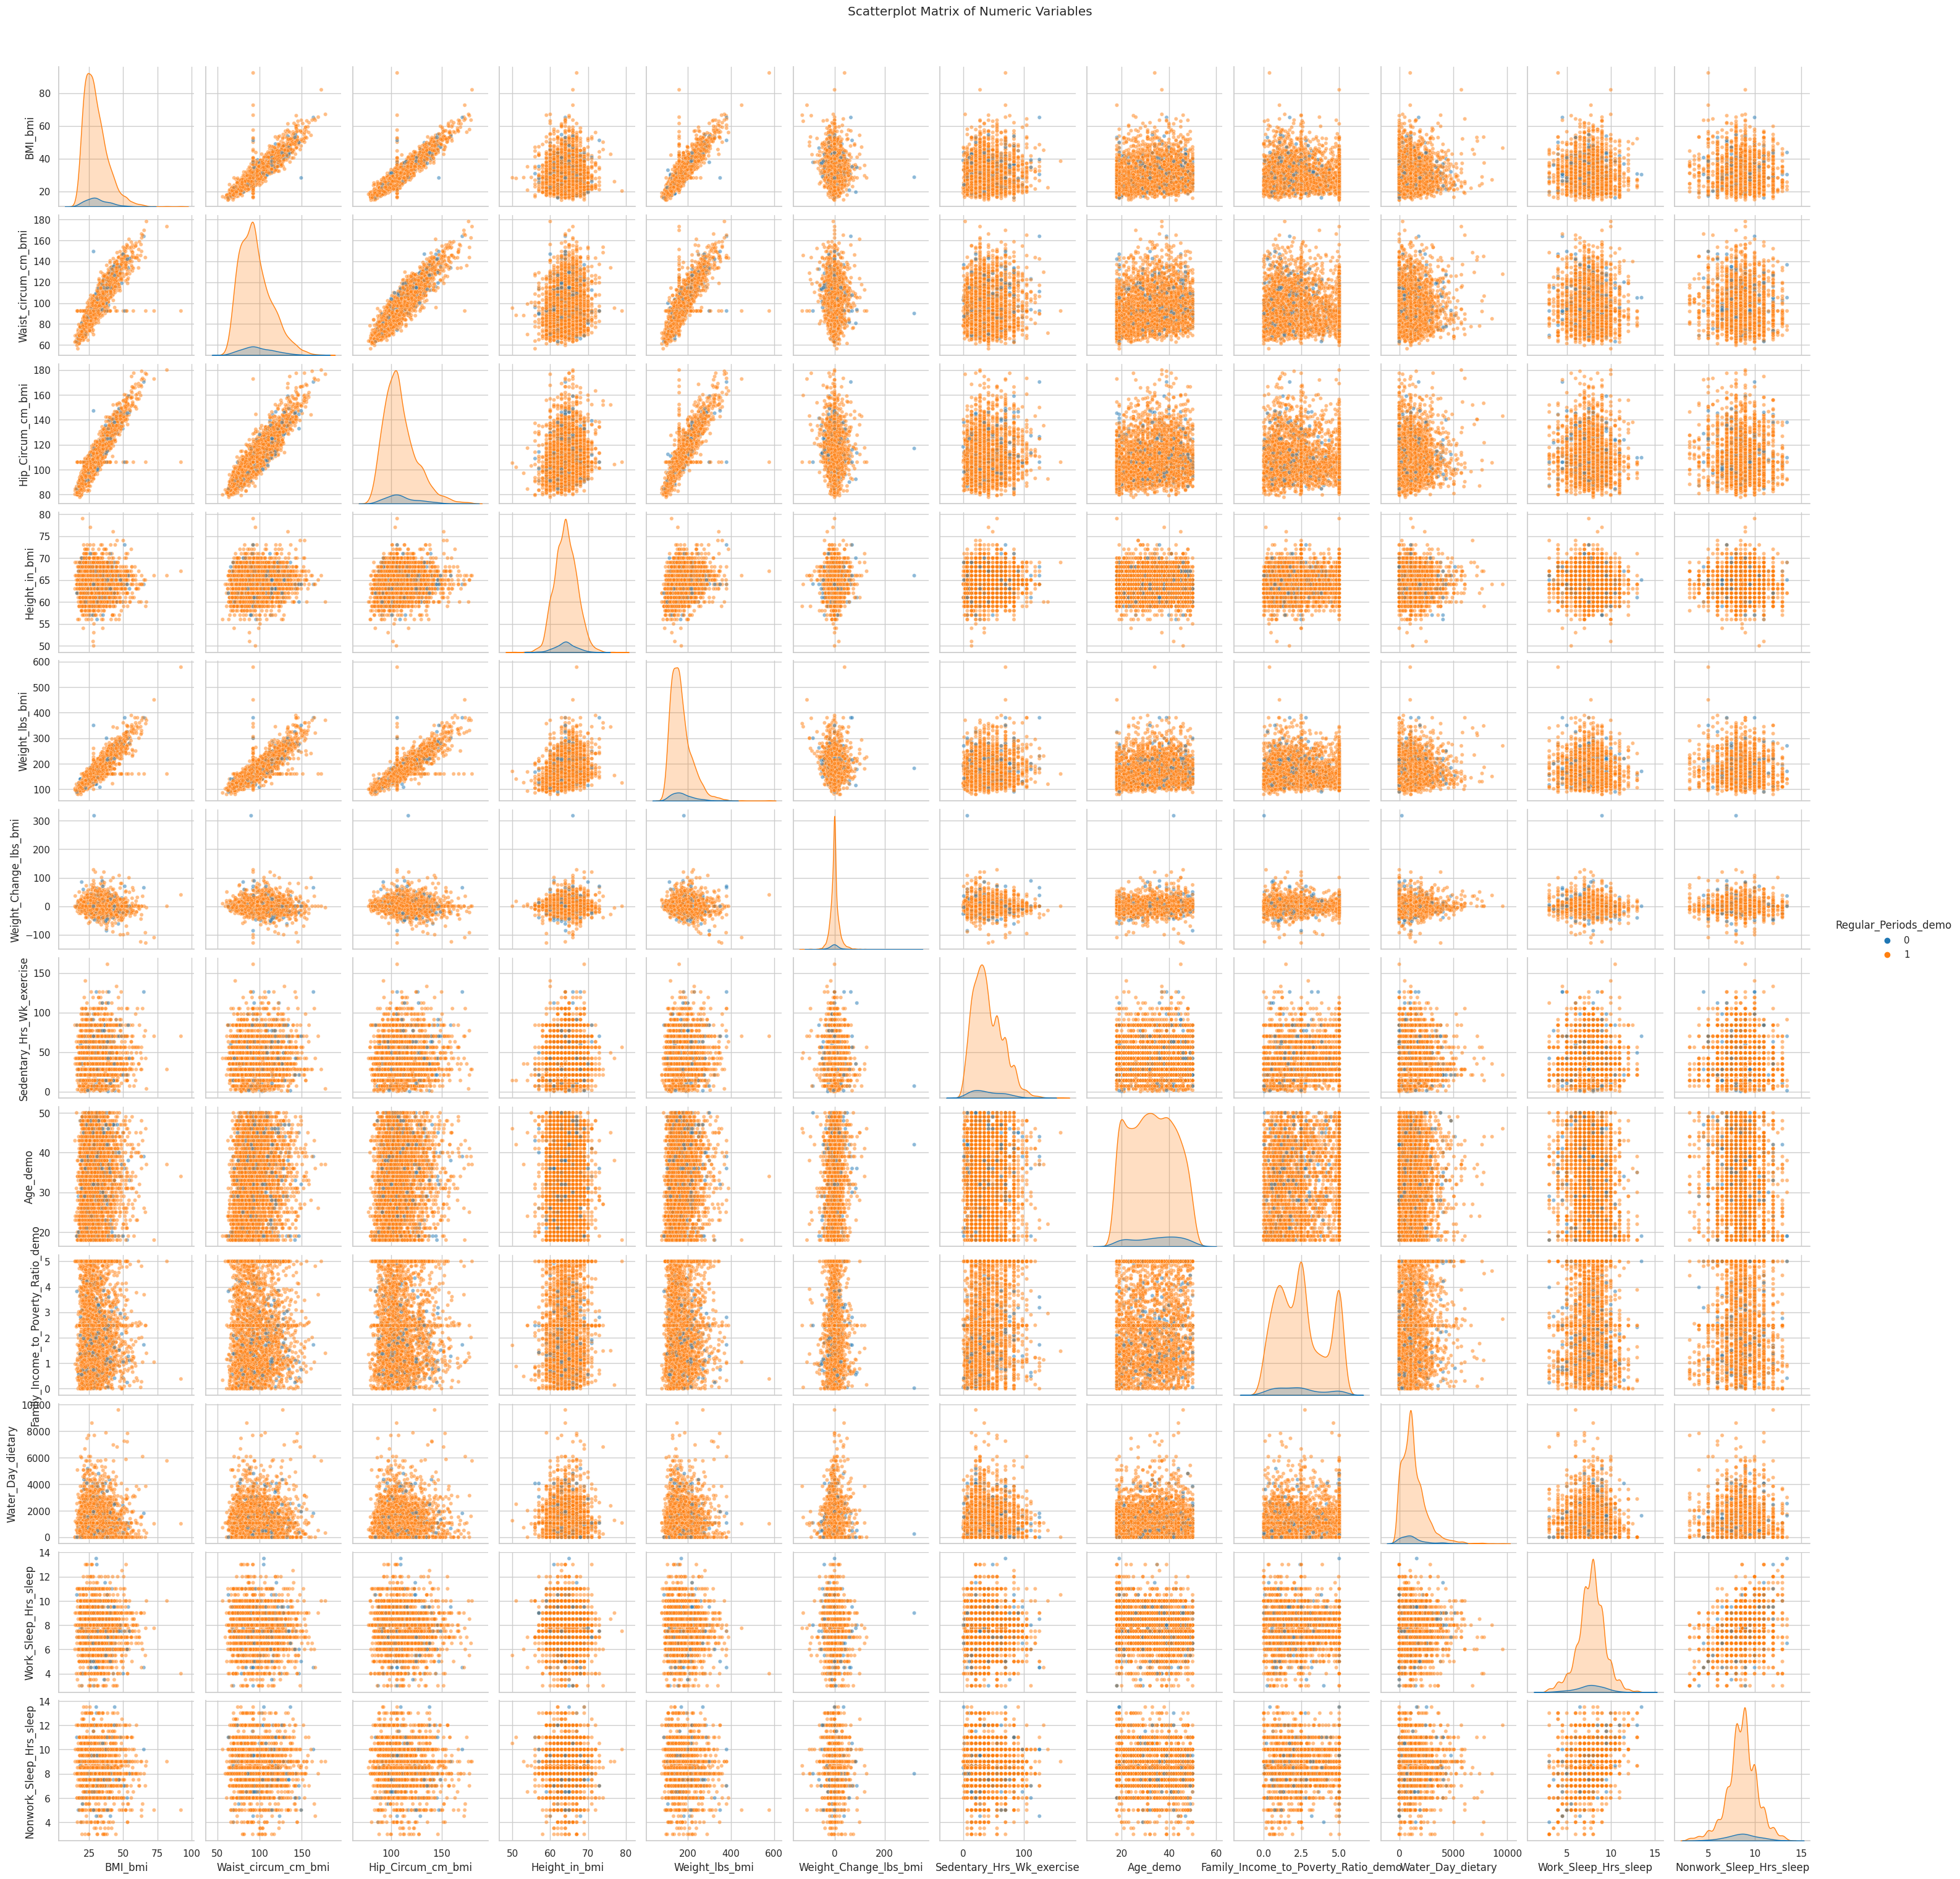

In [1486]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# assuming your dataframe is called df
# select only numeric columns
numeric_df = cleaned.select_dtypes(include=["int64","float64"])

# Drop SEQN
numeric_df = numeric_df.drop(columns=["SEQN"])


# Define custom 2-color palette
custom_palette = {0: "#1f77b4",   # blue
                  1: "#ff7f0e"}   # orange

# Pairplot
sns.pairplot(numeric_df, 
             diag_kind="kde",  # kde or hist for diagonal,
             hue="Regular_Periods_demo",     # color by group
             palette=custom_palette,
             plot_kws={"alpha":0.5, "s":20})  
plt.suptitle("Scatterplot Matrix of Numeric Variables", y=1.02)
plt.show()


In [1461]:
cleaned

SEQN  BMI_bmi  Waist_circum_cm_bmi  Hip_Circum_cm_bmi  \
0     109266.0     37.8                117.9              126.1   
1     109284.0     39.1                103.1              125.5   
2     109291.0     31.3                 92.5              106.0   
3     109297.0     23.2                 73.2               92.5   
4     109312.0     23.9                 95.7               96.3   
...        ...      ...                  ...                ...   
3138  142263.0     22.6                 80.4               95.0   
3139  142269.0     28.2                149.3              147.2   
3140  142280.0     38.4                124.1              130.0   
3141  142283.0     45.8                137.2              145.7   
3142  142300.0     32.6                 97.6              115.4   

     Attempted_Weight_Loss_bmi  Height_in_bmi  Weight_lbs_bmi  \
0                          Yes           64.0           210.0   
1                          Yes           60.0           178.0   
2                           No           64.0           148.0   
3                          Yes           60.0           120.0   
4                           No           66.0           139.0   
...                        ...            ...             ...   
3138                        No           65.0           135.0   
3139                        No           64.0           350.0   
3140                       Yes           69.0           250.0   
3141                       Yes           67.0           275.0   
3142                       Yes           62.0           169.0   

      Weight_Change_lbs_bmi Regular_Periods_smoking Smoked_100_smoking  ...  \
0                     -10.0                     Yes                 No  ...   
1                      -8.0                     Yes                 No  ...   
2                      -8.0                     Yes                 No  ...   
3                      -5.0                     Yes                 No  ...   
4                       0.0                     Yes                 No  ...   
...                     ...                     ...                ...  ...   
3138                    0.0                     Yes                 No  ...   
3139                    0.0                      No                 No  ...   
3140                   20.0                     Yes                 No  ...   
3141                    5.0                     Yes                 No  ...   
3142                    3.0                     Yes                Yes  ...   

     Dietary_Supp_dietary Regular_Periods_sleep  \
0                      No                   Yes   
1                     Yes                   Yes   
2                     Yes                   Yes   
3                      No                   Yes   
4                     Yes                   Yes   
...                   ...                   ...   
3138                  Yes                   Yes   
3139                   No                    No   
3140                   No                   Yes   
3141                  Yes                   Yes   
3142                   No                   Yes   

      Work_Sleep_Time_Category_sleep Work_Wake_Time_Category_sleep  \
0                 Normal (10pm-12am)            Early (before 6am)   
1                 Normal (10pm-12am)              Normal (6am-8am)   
2                Early (before 10pm)              Late (after 8am)   
3                Early (before 10pm)              Late (after 8am)   
4                 Normal (10pm-12am)              Normal (6am-8am)   
...                              ...                           ...   
3138              Normal (10pm-12am)              Normal (6am-8am)   
3139             Early (before 10pm)              Late (after 8am)   
3140             Early (before 10pm)              Late (after 8am)   
3141             Early (before 10pm)              Late (after 8am)   
3142              Normal (10pm-12am)              Normal (6am-8am)   

     Work_Sleep_Hrs_s

# Correlation Analysis

## Step 1:Point-biserial correlation vs. Mann–Whitney U test
To examine the relationship between numeric health and lifestyle variables (e.g., `BMI`, `physical activity`, `sleep`) and menstruation status (`regular_mapped`), we try two methods:
- Point–biserial correlation (special case of Pearson correlation): Measures the strength of association between a binary variable and a continuous one. It assumes approximate normality in the continuous variable, and balanced groups work best.
- Mann–Whitney U test(We can just use this one instead): Tests whether the distributions of the numeric variable differ between the two binary groups (good with imbalanced classes).

In [1462]:
# Map to numeric if not already
cleaned['Regular_Periods_demo'] = cleaned['Regular_Periods_demo'].map({'No': 0, 'Yes': 1})

from scipy.stats import pointbiserialr, mannwhitneyu


# ---- Automatically select numeric columns ----
numeric_cols = cleaned.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Regular_Periods_demo', 'SEQN']]


### Point-biserial correlation

In [1489]:
# ---- Point-biserial correlations ----

def effect_label(r):
    """Cohen's thresholds for correlation effect size"""
    if np.isnan(r):
        return "n/a"
    r = abs(r)
    if r < 0.10: return "negligible"
    if r < 0.30: return "small"
    if r < 0.50: return "medium"
    return "large"

# ---- Point-biserial correlations ----
results = []
for col in numeric_cols:
    corr, p = pointbiserialr(cleaned['Regular_Periods_demo'], cleaned[col])
    results.append({
        'Feature': col,
        'Correlation': corr,
        'p-value': p,
        'EffectSize': effect_label(corr)
    })

corr_df = pd.DataFrame(results)
corr_df = corr_df.sort_values(by='Correlation', key=abs, ascending=False)

print("Point-biserial correlations with effect size labels:\n", corr_df)


Point-biserial correlations with effect size labels:
                                 Feature  Correlation   p-value  EffectSize
7                              Age_demo    -0.049449  0.005557  negligible
1                   Waist_circum_cm_bmi    -0.046410  0.009262  negligible
4                        Weight_lbs_bmi    -0.040664  0.022622  negligible
0                               BMI_bmi    -0.034202  0.055208  negligible
2                     Hip_Circum_cm_bmi    -0.031914  0.073629  negligible
9                     Water_Day_dietary     0.025863  0.147175  negligible
8   Family_Income_to_Poverty_Ratio_demo     0.020631  0.247565  negligible
5                 Weight_Change_lbs_bmi    -0.014422  0.418955  negligible
6             Sedentary_Hrs_Wk_exercise    -0.011112  0.533472  negligible
11              Nonwork_Sleep_Hrs_sleep    -0.009553  0.592389  negligible
10                 Work_Sleep_Hrs_sleep     0.008429  0.636654  negligible
3                         Height_in_bmi    -0.

### Mann–Whitney U test

In [1473]:
# ---- Mann–Whitney U tests with effect size ----
results_m = []

for col in numeric_cols:
    group0 = cleaned.loc[cleaned['Regular_Periods_demo'] == 0, col].dropna()
    group1 = cleaned.loc[cleaned['Regular_Periods_demo'] == 1, col].dropna()
    
    if len(group0) > 0 and len(group1) > 0:  # avoid empty groups
        stat, p = mannwhitneyu(group0, group1, alternative='two-sided')
        
        n0, n1 = len(group0), len(group1)
        # Rank-biserial correlation (effect size)
        r_rb = (2 * stat) / (n0 * n1) - 1
        
        results_m.append({
            'Feature': col,
            'U-statistic': stat,
            'p-value': p,
            'Median_0': group0.median(),
            'Median_1': group1.median(),
            'N_0': n0,
            'N_1': n1,
            'Rank-Biserial_r': r_rb
        })

# Keep only significant results (p < 0.05)
mw_df = mw_df[mw_df['p-value'] < 0.05]

# Sort by p-value
mw_df = mw_df.sort_values(by='p-value')

print("\nMann–Whitney U tests (p < 0.05):\n", mw_df)



Mann–Whitney U tests (p < 0.05):
                Feature  U-statistic   p-value  Median_0  Median_1  N_0   N_1  \
1  Waist_circum_cm_bmi     338078.5  0.004728     95.35      92.5  206  2937   
7             Age_demo     337237.0  0.005788     36.00      33.0  206  2937   
0              BMI_bmi     333686.0  0.013283     29.95      28.2  206  2937   
4       Weight_lbs_bmi     332436.5  0.017434    169.00     160.0  206  2937   
9    Water_Day_dietary     276924.5  0.041795   1072.50    1072.5  206  2937   
2    Hip_Circum_cm_bmi     327360.5  0.048414    107.40     106.0  206  2937   

   Rank-Biserial_r  
1         0.117574  
7         0.114793  
0         0.103054  
4         0.098924  
9        -0.084580  
2         0.082144  


## Results
While several variables (age, BMI, waist circumference, weight, hip circumference) reached statistical significance(5%), all effect sizes were small (r_rb ≤ 0.12). This indicates that, although detectable differences exist, they are not strong and should be interpreted with caution.

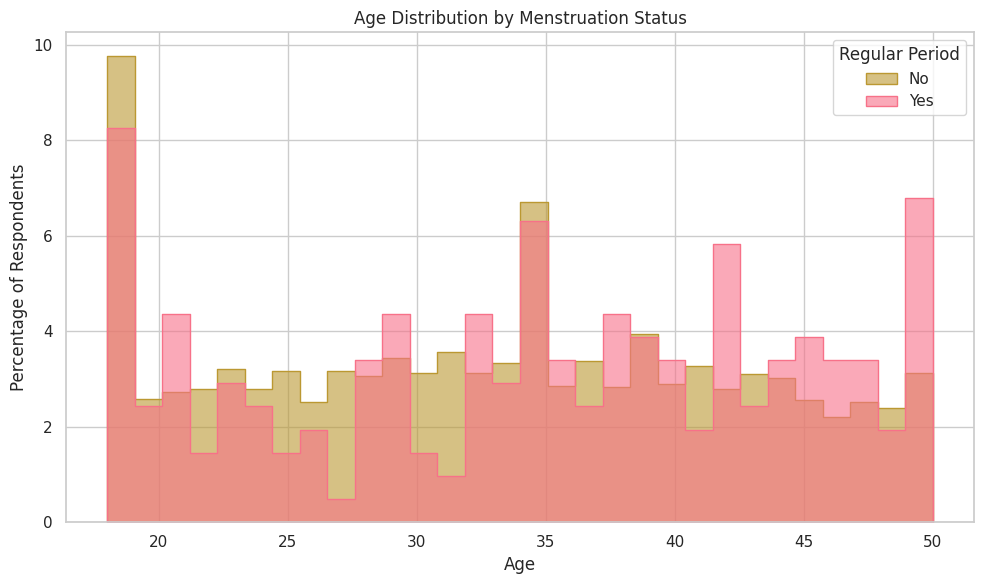

In [1467]:


plt.figure(figsize=(10, 6))
sns.histplot(
    data=cleaned,
    x="Age_demo",
    hue="Regular_Periods_demo",   # split by menstruation status
    bins=30,
    stat="percent",         # percent makes groups directly comparable
    element="step",         # outlines for clarity
    common_norm=False,      # each group normalized separately
    alpha=0.6
)

plt.title("Age Distribution by Menstruation Status")
plt.xlabel("Age")
plt.ylabel("Percentage of Respondents")
plt.legend(title="Regular Period", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


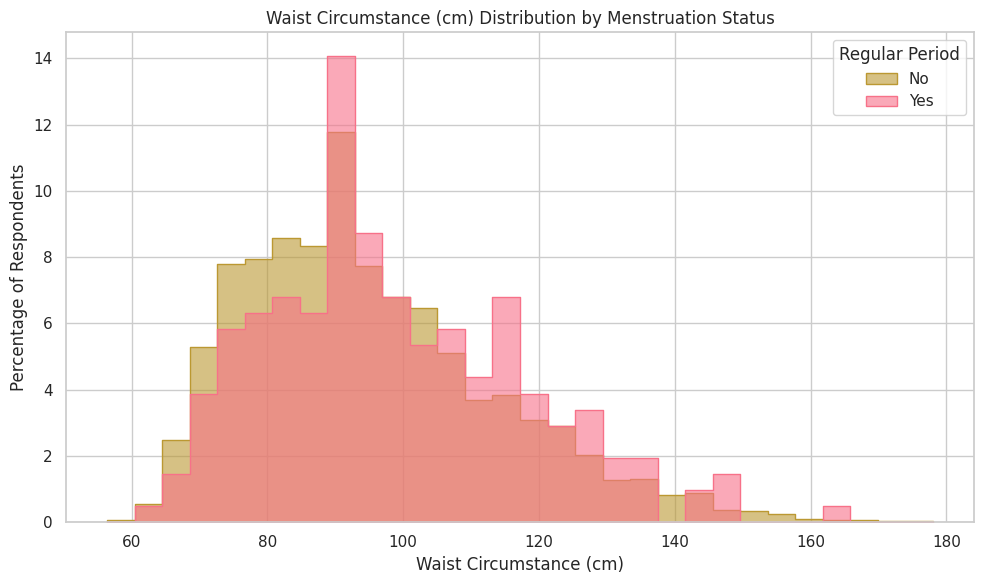

In [1480]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=cleaned,
    x="Waist_circum_cm_bmi",
    hue="Regular_Periods_demo",   # split by menstruation status
    bins=30,
    stat="percent",         # show percent to compare fairly
    element="step",         # outline style, like a density overlay
    common_norm=False,      # normalize each group separately
    alpha=0.6
)

plt.title("Waist Circumstance (cm) Distribution by Menstruation Status")
plt.xlabel("Waist Circumstance (cm)")
plt.ylabel("Percentage of Respondents")
plt.legend(title="Regular Period", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


## Step 2: Chi-square test of independence vs. Fisher’s exact test

- Chi-square test of independence (if counts are big enough). Rule of thumb: expected cell counts ≥ 5.

- Fisher’s exact test (if any expected cell counts are small → better for imbalanced classes).

### Chi-square test of independence

In [1491]:
from scipy.stats import chi2_contingency

def cramers_v(chi2, n, r, c):
    """Standard Cramér's V."""
    denom = n * (min(r - 1, c - 1))
    return np.sqrt(chi2 / denom) if denom > 0 else np.nan

def cramers_v_bias_corrected(chi2, n, r, c):
    """
    Bias-corrected Cramér's V (Bergsma & Wicher, 2013).
    More reliable with small samples or imbalanced tables.
    """
    if n <= 1:
        return np.nan
    phi2 = chi2 / n
    phi2_corr = max(0.0, phi2 - ((c - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    c_corr = c - ((c - 1) ** 2) / (n - 1)
    denom = min(r_corr - 1, c_corr - 1)
    return np.sqrt(phi2_corr / denom) if denom > 0 else np.nan

def v_label(v):
    """Quick interpretation labels for Cramér’s V."""
    if np.isnan(v):
        return "n/a"
    if v < 0.10: return "negligible"
    if v < 0.30: return "small"
    if v < 0.50: return "medium"
    return "large"

# ---- Run Chi-square + Cramér’s V for all categorical columns ----
categorical_cols = cleaned.select_dtypes(include=['object', 'category']).columns
categorical_cols = [col for col in categorical_cols if 'Regular_Periods_' not in col]

cat_results = []

for col in categorical_cols:
    contingency = pd.crosstab(cleaned['Regular_Periods_demo'], cleaned[col])

    chi2, p_chi2, dof, expected = chi2_contingency(contingency)

    r, c = contingency.shape
    n = contingency.values.sum()

    v = cramers_v(chi2, n, r, c)
    v_bc = cramers_v_bias_corrected(chi2, n, r, c)

    cat_results.append({
        'Feature': col,
        'Rows': r,
        'Cols': c,
        'Chi2': chi2,
        'Chi2_p': p_chi2,
        "CramersV": v,
        "CramersV_biascorr": v_bc,
        "EffectSize": v_label(v_bc if not np.isnan(v_bc) else v)
    })

cat_corr_df = pd.DataFrame(cat_results).sort_values('Chi2_p')
sig_results = cat_corr_df[cat_corr_df['Chi2_p'] < 0.05].sort_values('Chi2_p')
print("Chi-square test of independence with effect size labels:\n", sig_results)


Chi-square test of independence with effect size labels:
                               Feature  Rows  Cols       Chi2    Chi2_p  \
3                           Race_demo     2     6  19.280819  0.001704   
4                      Education_demo     2     5  14.948211  0.004810   
1                  Smoked_100_smoking     2     2   5.585656  0.018108   
7                   Salt_Used_dietary     2     4   9.761126  0.020710   
10     Work_Sleep_Time_Category_sleep     2     2   4.661779  0.030841   
13  Nonwork_Sleep_Time_Category_sleep     2     2   4.661779  0.030841   
11      Work_Wake_Time_Category_sleep     2     3   6.858437  0.032412   
2      Household_Smoker_Count_smoking     2     3   6.173033  0.045661   

    CramersV  CramersV_biascorr  EffectSize  
3   0.078323           0.067414  negligible  
4   0.068964           0.059026  negligible  
1   0.042157           0.038202  negligible  
7   0.055729           0.046385  negligible  
10  0.038513           0.034137  negligible  

## Results
Several categorical variables (race, education, smoking history, salt use, sleep timing) showed statistically significant associations with menstrual regularity (p < 0.05, chi-square test). However, the effect sizes were negligible (bias-corrected Cramér’s V ≤ 0.07), indicating that while the associations are detectable with this sample size, they are weak in practical terms.

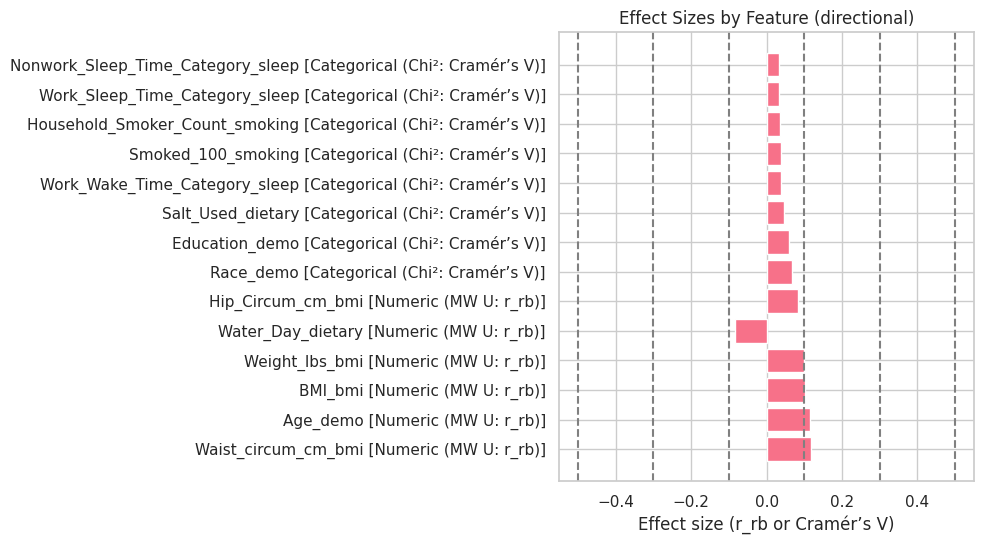

In [1478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Assumptions ---
# You already have:
#   mw_df with columns: ['Feature','p-value','Rank-Biserial_r', ...]
#   cat_corr_df with columns: ['Feature','Chi2_p','CramersV_biascorr', ...]
# If your column names differ, tweak below accordingly.

# ------- Build a unified effect-size table -------
num_eff = mw_df[['Feature', 'Rank-Biserial_r', 'p-value']].copy()
num_eff.rename(columns={'Rank-Biserial_r': 'Effect', 'p-value': 'p'}, inplace=True)
num_eff['Type'] = 'Numeric (MW U: r_rb)'

cat_eff = cat_corr_df[['Feature', 'CramersV_biascorr', 'Chi2_p']].copy()
cat_eff.rename(columns={'CramersV_biascorr': 'Effect', 'Chi2_p': 'p'}, inplace=True)
cat_eff['Type'] = 'Categorical (Chi²: Cramér’s V)'

eff_all = pd.concat([num_eff, cat_eff], ignore_index=True)

# Optional: keep only significant effects (comment out to show all)
sig_only = True
if sig_only:
    eff_all = eff_all[eff_all['p'] < 0.05].copy()

# Compute |effect| for sorting/plotting
eff_all['AbsEffect'] = eff_all['Effect'].abs()

# Sort by absolute effect size (largest first)
eff_all = eff_all.sort_values('AbsEffect', ascending=False)

# If nothing passes the filter, short-circuit gracefully
if eff_all.empty:
    print("No effects to plot with current filter (e.g., p < 0.05). Consider setting sig_only=False.")
else:
    # ------- Plot: horizontal bar chart of effect sizes -------
    plt.figure(figsize=(10, max(4, 0.4 * len(eff_all))))

    # Bar positions and labels
    y_pos = np.arange(len(eff_all))
    # Plot signed effects so direction is visible; you can switch to AbsEffect if you prefer
    plt.barh(y_pos, eff_all['Effect'])

    # Y tick labels show feature and (type)
    y_labels = [f"{f} [{t}]" for f, t in zip(eff_all['Feature'], eff_all['Type'])]
    plt.yticks(y_pos, y_labels)

    # Reference thresholds (negligible/small/medium/large)
    for thr in (0.10, 0.30, 0.50):
        plt.axvline(x=thr, linestyle='--', color ='gray')
        plt.axvline(x=-thr, linestyle='--',color='gray')

    plt.xlabel('Effect size (r_rb or Cramér’s V)')
    plt.title('Effect Sizes by Feature (directional)')

    plt.tight_layout()
    plt.show()


Notes

- Direction: For Mann–Whitney, the sign of r_rb indicates which group tends higher (positive ≈ group 0 higher; negative ≈ group 1 higher). Cramér’s V is non-directional by definition; it will just appear non-negative—keeping signs allows the numeric effects to show direction while categorical remain ≥0.

- Thresholds: Vertical dashed lines at 0.10 / 0.30 / 0.50 give quick “negligible/small/medium/large” cues.

- Significance filter: Set sig_only=False to show all effects (often helpful when everything’s small, so readers see “no signal”).